# Step.3 Optimize the Model
# Exploratory Optimization: Increasing Epochs from 100 to 200

In [61]:
## Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()
# Target: IS_SUCCESSFUL
# Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION,
#           USE_CASE, ORGANIZATION, STATUS, INCOME_AMT,
#           SPECIAL_CONSIDERATIONS, ASK_AMT


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [62]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

In [7]:
# Bucket APPLICATION_TYPE
application_counts = application_df["APPLICATION_TYPE"].value_counts()

# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket CLASSIFICATION
classification_counts = application_df["CLASSIFICATION"].value_counts()

# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [8]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn_inc_epochs = tf.keras.models.Sequential()

# First hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_inc_epochs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-05-16 23:42:43.322731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Compile the model
nn_inc_epochs.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Increasing number of epochs to 200
fit_model_inc_epochs = nn_inc_epochs.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 849us/step - loss: 0.5703 - accuracy: 0.7210
Epoch 2/200
804/804 [==============================] - 1s 879us/step - loss: 0.5571 - accuracy: 0.7273
Epoch 3/200
804/804 [==============================] - 1s 839us/step - loss: 0.5532 - accuracy: 0.7283
Epoch 4/200
804/804 [==============================] - 1s 878us/step - loss: 0.5517 - accuracy: 0.7298
Epoch 5/200
804/804 [==============================] - 1s 852us/step - loss: 0.5504 - accuracy: 0.7313
Epoch 6/200
804/804 [==============================] - 1s 832us/step - loss: 0.5492 - accuracy: 0.7311
Epoch 7/200
804/804 [==============================] - 1s 838us/step - loss: 0.5482 - accuracy: 0.7308
Epoch 8/200
804/804 [==============================] - 1s 831us/step - loss: 0.5475 - accuracy: 0.7320
Epoch 9/200
804/804 [==============================] - 1s 830us/step - loss: 0.5470 - accuracy: 0.7309
Epoch 10/200
804/804 [==============================] - 1s 828us/step - l

804/804 [==============================] - 1s 820us/step - loss: 0.5366 - accuracy: 0.7382
Epoch 80/200
804/804 [==============================] - 1s 824us/step - loss: 0.5361 - accuracy: 0.7382
Epoch 81/200
804/804 [==============================] - 1s 827us/step - loss: 0.5358 - accuracy: 0.7377
Epoch 82/200
804/804 [==============================] - 1s 840us/step - loss: 0.5357 - accuracy: 0.7371
Epoch 83/200
804/804 [==============================] - 1s 818us/step - loss: 0.5361 - accuracy: 0.7382
Epoch 84/200
804/804 [==============================] - 1s 820us/step - loss: 0.5356 - accuracy: 0.7386
Epoch 85/200
804/804 [==============================] - 1s 832us/step - loss: 0.5357 - accuracy: 0.7379
Epoch 86/200
804/804 [==============================] - 1s 821us/step - loss: 0.5358 - accuracy: 0.7384
Epoch 87/200
804/804 [==============================] - 1s 821us/step - loss: 0.5354 - accuracy: 0.7386
Epoch 88/200
804/804 [==============================] - 1s 819us/step - loss:

804/804 [==============================] - 1s 857us/step - loss: 0.5355 - accuracy: 0.7392
Epoch 158/200
804/804 [==============================] - 1s 843us/step - loss: 0.5342 - accuracy: 0.7391
Epoch 159/200
804/804 [==============================] - 1s 838us/step - loss: 0.5328 - accuracy: 0.7402
Epoch 160/200
804/804 [==============================] - 1s 858us/step - loss: 0.5326 - accuracy: 0.7396
Epoch 161/200
804/804 [==============================] - 1s 836us/step - loss: 0.5325 - accuracy: 0.7393
Epoch 162/200
804/804 [==============================] - 1s 834us/step - loss: 0.5325 - accuracy: 0.7393
Epoch 163/200
804/804 [==============================] - 1s 829us/step - loss: 0.5325 - accuracy: 0.7392
Epoch 164/200
804/804 [==============================] - 1s 830us/step - loss: 0.5327 - accuracy: 0.7402
Epoch 165/200
804/804 [==============================] - 1s 826us/step - loss: 0.5327 - accuracy: 0.7392
Epoch 166/200
804/804 [==============================] - 1s 832us/ste

In [13]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_inc_epochs.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5747 - accuracy: 0.7298 - 229ms/epoch - 855us/step
Loss: 0.5747418999671936, Accuracy: 0.7297959327697754


# Changing activation function from relu to tanh

In [14]:
# Changing Activation Function: try tanh to handle negative inputs in X_train_scaled
nn_tanh = tf.keras.models.Sequential()

# First hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_tanh.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_tanh.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
fit_model_tanh = nn_tanh.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 874us/step - loss: 0.5699 - accuracy: 0.7217
Epoch 2/100
804/804 [==============================] - 1s 857us/step - loss: 0.5556 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 1s 841us/step - loss: 0.5520 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 1s 853us/step - loss: 0.5505 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 1s 843us/step - loss: 0.5486 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 1s 883us/step - loss: 0.5478 - accuracy: 0.7312
Epoch 7/100
804/804 [==============================] - 1s 865us/step - loss: 0.5464 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 1s 880us/step - loss: 0.5459 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 1s 859us/step - loss: 0.5455 - accuracy: 0.7326
Epoch 10/100
804/804 [==============================] - 1s 842us/step - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7401
Epoch 80/100
804/804 [==============================] - 1s 873us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 81/100
804/804 [==============================] - 1s 890us/step - loss: 0.5323 - accuracy: 0.7397
Epoch 82/100
804/804 [==============================] - 1s 852us/step - loss: 0.5322 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 1s 843us/step - loss: 0.5321 - accuracy: 0.7398
Epoch 84/100
804/804 [==============================] - 1s 844us/step - loss: 0.5324 - accuracy: 0.7397
Epoch 85/100
804/804 [==============================] - 1s 851us/step - loss: 0.5318 - accuracy: 0.7409
Epoch 86/100
804/804 [==============================] - 1s 840us/step - loss: 0.5321 - accuracy: 0.7400
Epoch 87/100
804/804 [==============================] - 1s 844us/step - loss: 0.5319 - accuracy: 0.7383
Epoch 88/100
804/804 [==============================] - 1s 843us/step - loss: 0

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_tanh.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5601 - accuracy: 0.7278 - 211ms/epoch - 787us/step
Loss: 0.560107946395874, Accuracy: 0.7278134226799011


# Reducing Number of Input Features with additional binning and removing redundant columns

In [18]:
# Reducing Number of Input Features
# "SPECIAL_CONSIDERATIONS_N" and "SPECIAL_CONSIDERATIONS_Y" are dedundant, drop "SPECIAL_CONSIDERATIONS_N"
# Bin categorical columns with more than 5 unique values
# Re-read data
application_df = pd.read_csv("Resources/charity_data.csv")

In [19]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bucket "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [20]:
# Look at INCOME_AMT value counts for bucketing
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [21]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure bucketing was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [22]:
# Look at AFFILIATION value counts for bucketing
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [23]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure bucketing was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

In [25]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [26]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2800      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 834us/step - loss: 0.5734 - accuracy: 0.7164
Epoch 2/100
804/804 [==============================] - 1s 836us/step - loss: 0.5586 - accuracy: 0.7235
Epoch 3/100
804/804 [==============================] - 1s 836us/step - loss: 0.5566 - accuracy: 0.7251
Epoch 4/100
804/804 [==============================] - 1s 835us/step - loss: 0.5545 - accuracy: 0.7267
Epoch 5/100
804/804 [==============================] - 1s 849us/step - loss: 0.5539 - accuracy: 0.7276
Epoch 6/100
804/804 [==============================] - 1s 855us/step - loss: 0.5527 - accuracy: 0.7295
Epoch 7/100
804/804 [==============================] - 1s 860us/step - loss: 0.5520 - accuracy: 0.7282
Epoch 8/100
804/804 [==============================] - 1s 835us/step - loss: 0.5512 - accuracy: 0.7296
Epoch 9/100
804/804 [==============================] - 1s 826us/step - loss: 0.5512 - accuracy: 0.7291
Epoch 10/100
804/804 [==============================] - 1s 831us/step - l

804/804 [==============================] - 1s 826us/step - loss: 0.5390 - accuracy: 0.7362
Epoch 80/100
804/804 [==============================] - 1s 827us/step - loss: 0.5393 - accuracy: 0.7369
Epoch 81/100
804/804 [==============================] - 1s 825us/step - loss: 0.5395 - accuracy: 0.7360
Epoch 82/100
804/804 [==============================] - 1s 824us/step - loss: 0.5394 - accuracy: 0.7371
Epoch 83/100
804/804 [==============================] - 1s 827us/step - loss: 0.5395 - accuracy: 0.7364
Epoch 84/100
804/804 [==============================] - 1s 841us/step - loss: 0.5394 - accuracy: 0.7364
Epoch 85/100
804/804 [==============================] - 1s 884us/step - loss: 0.5392 - accuracy: 0.7374
Epoch 86/100
804/804 [==============================] - 1s 827us/step - loss: 0.5393 - accuracy: 0.7375
Epoch 87/100
804/804 [==============================] - 1s 823us/step - loss: 0.5396 - accuracy: 0.7376
Epoch 88/100
804/804 [==============================] - 1s 818us/step - loss:

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5597 - accuracy: 0.7328 - 218ms/epoch - 814us/step
Loss: 0.5596936345100403, Accuracy: 0.7328279614448547


# Systematic Optimzation

Following https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345 guide.

Parameters of Interest (Base Example)

 . Number of hidden Layers/Nodes per Layer - specified as list of nodes ([80, 30])
 
 . Activation function (relu)
 
 . learning_rate (0.001)
 
 . epochs (100)
 
 . Bin Categorical Variables (True)
 
Plan

 . Create function that builds, trains, and tests model with parameters above as inputs and returns testing accuracy
 
 . Vary each parameter above while keeping others constant at base value
 
 . Naive solution: Take parameters generating highest testing accuracy and combine into super model


In [32]:
# Helper function to bin specified categorical columns with value counts less than min_count

def bin_cat_col(df, column, min_count):
    counts = df[column].value_counts()
    to_replace = list(counts[counts < min_count].index)
    for rep in to_replace:
        df[col] = df[col].replace(rep, "Other")

In [33]:
# Helper function to print results

def print_results(param_choice, input_vals, results):
    print(param_choice)
    for i in range(len(input_vals)):
        print(input_vals[i])
        print("Model Loss:", results[i][0])
        print("Model Accuracy:", results[i][1])
        print("")

In [35]:
# Function to build, train, and test neural network model with specified parameters

def build_train_test(architecture=(80, 30), activation="relu",
                     learning_rate=0.001, epochs=100, cat_cutoffs={},
                     batch_size=None):
    """
    Function to read and preprocess `charity_data.csv` and build, train,
    and test neural network binary classifier with specified parameters.

    Parameters:
    -----------
    architecture : tuple
        Number of hidden layers and nodes per layer. Default (80, 30)
        specifies two hidden layers, the first hidden layer with 80 nodes
        and the second hidden layer with 30 nodes

    activation : string
        Activation function defined in `tensorflow.keras.activations`
        passed as string

    learning_rate : float
        Learning rate of the Adam optimizer

    epochs : int
        Number of epochs for training

    cat_cutoffs : dict
        Specifies which categorical variables should have bucketings and
        the minimum number of values to stay out of the bucket, e.g.
        {"CLASSIFICATION": 1800} specifies to bucket values in the
        CLASSIFICATION feature that occur less than 1800 times

    batch_size : int
        Batch size to be used during traing. The default `None` values
        results in a batch size of 32 during training.
    """
    # Read Data
    application_df = pd.read_csv("Resources/charity_data.csv")
    application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
    
    # Preprocess Data
    # Check for bucketing categorical columns
    if len(cat_cutoffs) > 0:
        for col in cat_cutoffs:
            bin_cat_col(application_df, col, cat_cutoffs[col])

    # Encode Categorical columns
    # Generate our categorical variable lists
    application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
    
    # Create a OneHotEncoder instance
    enc = OneHotEncoder(sparse=False)
    
    # Fit and transform the OneHotEncoder using the categorical variable list
    encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
    
    # Add the encoded variable names to the dataframe
    encode_df.columns = enc.get_feature_names(application_cat)
    
    # Merge one-hot encoded features and drop the originals
    application_df = application_df.merge(encode_df, left_index=True, right_index=True)
    application_df = application_df.drop(labels=application_cat, axis=1)

    # Drop "SPECIAL_CONSIDERATION_N":
    application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)

    # Split our preprocessed data into our features and target arrays
    y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
    X = application_df.drop("IS_SUCCESSFUL", axis=1).values
    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Create a StandardScaler instances
    scaler = StandardScaler()
    
    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)
    
    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Define the model
    number_input_features = len(X_train_scaled[0])
    nn = tf.keras.models.Sequential()
    
    # Input layer and first hidden layer specified in `architecture`
    nn.add(tf.keras.layers.Dense(units=architecture[0], input_dim=number_input_features, activation=activation))

    if len(architecture) > 1:
        # Remaining hidden layers specified in `architecture`
        for i in range(1, len(architecture)):
            nn.add(tf.keras.layers.Dense(units=architecture[i], activation=activation))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    
    # Compile the model
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs)
    
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
    return (model_loss, model_accuracy)


# Varying Epochs

In [36]:
training_epochs = [50, 100, 200, 300]
results = []
for te in training_epochs:
    result = build_train_test(epochs=te)
    results.append(result)  

Epoch 1/50
804/804 [==============================] - 1s 862us/step - loss: 0.5776 - accuracy: 0.7193
Epoch 2/50
804/804 [==============================] - 1s 891us/step - loss: 0.5547 - accuracy: 0.7299
Epoch 3/50
804/804 [==============================] - 1s 851us/step - loss: 0.5514 - accuracy: 0.7306
Epoch 4/50
804/804 [==============================] - 1s 863us/step - loss: 0.5495 - accuracy: 0.7302
Epoch 5/50
804/804 [==============================] - 1s 856us/step - loss: 0.5478 - accuracy: 0.7331
Epoch 6/50
804/804 [==============================] - 1s 848us/step - loss: 0.5464 - accuracy: 0.7326
Epoch 7/50
804/804 [==============================] - 1s 847us/step - loss: 0.5453 - accuracy: 0.7344
Epoch 8/50
804/804 [==============================] - 1s 859us/step - loss: 0.5450 - accuracy: 0.7347
Epoch 9/50
804/804 [==============================] - 1s 852us/step - loss: 0.5441 - accuracy: 0.7335
Epoch 10/50
804/804 [==============================] - 1s 888us/step - loss: 0.542

804/804 [==============================] - 1s 862us/step - loss: 0.5339 - accuracy: 0.7393
Epoch 30/100
804/804 [==============================] - 1s 836us/step - loss: 0.5337 - accuracy: 0.7400
Epoch 31/100
804/804 [==============================] - 1s 838us/step - loss: 0.5341 - accuracy: 0.7399
Epoch 32/100
804/804 [==============================] - 1s 915us/step - loss: 0.5330 - accuracy: 0.7405
Epoch 33/100
804/804 [==============================] - 1s 838us/step - loss: 0.5334 - accuracy: 0.7390
Epoch 34/100
804/804 [==============================] - 1s 839us/step - loss: 0.5330 - accuracy: 0.7405
Epoch 35/100
804/804 [==============================] - 1s 837us/step - loss: 0.5327 - accuracy: 0.7400
Epoch 36/100
804/804 [==============================] - 1s 839us/step - loss: 0.5324 - accuracy: 0.7399
Epoch 37/100
804/804 [==============================] - 1s 838us/step - loss: 0.5324 - accuracy: 0.7399
Epoch 38/100
804/804 [==============================] - 1s 837us/step - loss:

804/804 [==============================] - 1s 853us/step - loss: 0.5439 - accuracy: 0.7332
Epoch 8/200
804/804 [==============================] - 1s 846us/step - loss: 0.5436 - accuracy: 0.7344
Epoch 9/200
804/804 [==============================] - 1s 848us/step - loss: 0.5426 - accuracy: 0.7355
Epoch 10/200
804/804 [==============================] - 1s 846us/step - loss: 0.5415 - accuracy: 0.7341
Epoch 11/200
804/804 [==============================] - 1s 847us/step - loss: 0.5410 - accuracy: 0.7358
Epoch 12/200
804/804 [==============================] - 1s 848us/step - loss: 0.5405 - accuracy: 0.7354
Epoch 13/200
804/804 [==============================] - 1s 847us/step - loss: 0.5405 - accuracy: 0.7365
Epoch 14/200
804/804 [==============================] - 1s 846us/step - loss: 0.5394 - accuracy: 0.7366
Epoch 15/200
804/804 [==============================] - 1s 852us/step - loss: 0.5393 - accuracy: 0.7367
Epoch 16/200
804/804 [==============================] - 1s 844us/step - loss: 0

804/804 [==============================] - 1s 847us/step - loss: 0.5285 - accuracy: 0.7420
Epoch 86/200
804/804 [==============================] - 1s 866us/step - loss: 0.5289 - accuracy: 0.7422
Epoch 87/200
804/804 [==============================] - 1s 883us/step - loss: 0.5287 - accuracy: 0.7426
Epoch 88/200
804/804 [==============================] - 1s 847us/step - loss: 0.5286 - accuracy: 0.7422
Epoch 89/200
804/804 [==============================] - 1s 889us/step - loss: 0.5286 - accuracy: 0.7414
Epoch 90/200
804/804 [==============================] - 1s 855us/step - loss: 0.5280 - accuracy: 0.7423
Epoch 91/200
804/804 [==============================] - 1s 849us/step - loss: 0.5291 - accuracy: 0.7423
Epoch 92/200
804/804 [==============================] - 1s 853us/step - loss: 0.5287 - accuracy: 0.7422
Epoch 93/200
804/804 [==============================] - 1s 851us/step - loss: 0.5281 - accuracy: 0.7425
Epoch 94/200
804/804 [==============================] - 1s 930us/step - loss:

804/804 [==============================] - 1s 855us/step - loss: 0.5281 - accuracy: 0.7431
Epoch 164/200
804/804 [==============================] - 1s 979us/step - loss: 0.5265 - accuracy: 0.7433
Epoch 165/200
804/804 [==============================] - 1s 912us/step - loss: 0.5257 - accuracy: 0.7430
Epoch 166/200
804/804 [==============================] - 1s 936us/step - loss: 0.5258 - accuracy: 0.7437
Epoch 167/200
804/804 [==============================] - 1s 874us/step - loss: 0.5259 - accuracy: 0.7437
Epoch 168/200
804/804 [==============================] - 1s 982us/step - loss: 0.5263 - accuracy: 0.7430
Epoch 169/200
804/804 [==============================] - 1s 848us/step - loss: 0.5261 - accuracy: 0.7429
Epoch 170/200
804/804 [==============================] - 1s 846us/step - loss: 0.5256 - accuracy: 0.7429
Epoch 171/200
804/804 [==============================] - 1s 898us/step - loss: 0.5264 - accuracy: 0.7434
Epoch 172/200
804/804 [==============================] - 1s 842us/ste

804/804 [==============================] - 1s 953us/step - loss: 0.5330 - accuracy: 0.7416
Epoch 41/300
804/804 [==============================] - 1s 869us/step - loss: 0.5332 - accuracy: 0.7417
Epoch 42/300
804/804 [==============================] - 1s 867us/step - loss: 0.5326 - accuracy: 0.7420
Epoch 43/300
804/804 [==============================] - 1s 861us/step - loss: 0.5330 - accuracy: 0.7418
Epoch 44/300
804/804 [==============================] - 1s 860us/step - loss: 0.5326 - accuracy: 0.7417
Epoch 45/300
804/804 [==============================] - 1s 858us/step - loss: 0.5324 - accuracy: 0.7425
Epoch 46/300
804/804 [==============================] - 1s 852us/step - loss: 0.5324 - accuracy: 0.7431
Epoch 47/300
804/804 [==============================] - 1s 866us/step - loss: 0.5323 - accuracy: 0.7418
Epoch 48/300
804/804 [==============================] - 1s 850us/step - loss: 0.5320 - accuracy: 0.7427
Epoch 49/300
804/804 [==============================] - 1s 843us/step - loss:

804/804 [==============================] - 1s 849us/step - loss: 0.5277 - accuracy: 0.7437
Epoch 119/300
804/804 [==============================] - 1s 841us/step - loss: 0.5271 - accuracy: 0.7436
Epoch 120/300
804/804 [==============================] - 1s 846us/step - loss: 0.5270 - accuracy: 0.7449
Epoch 121/300
804/804 [==============================] - 1s 852us/step - loss: 0.5271 - accuracy: 0.7440
Epoch 122/300
804/804 [==============================] - 1s 852us/step - loss: 0.5268 - accuracy: 0.7437
Epoch 123/300
804/804 [==============================] - 1s 852us/step - loss: 0.5269 - accuracy: 0.7441
Epoch 124/300
804/804 [==============================] - 1s 924us/step - loss: 0.5274 - accuracy: 0.7442
Epoch 125/300
804/804 [==============================] - 1s 842us/step - loss: 0.5267 - accuracy: 0.7437
Epoch 126/300
804/804 [==============================] - 1s 853us/step - loss: 0.5264 - accuracy: 0.7440
Epoch 127/300
804/804 [==============================] - 1s 848us/ste

804/804 [==============================] - 1s 873us/step - loss: 0.5256 - accuracy: 0.7444
Epoch 197/300
804/804 [==============================] - 1s 881us/step - loss: 0.5259 - accuracy: 0.7449
Epoch 198/300
804/804 [==============================] - 1s 868us/step - loss: 0.5253 - accuracy: 0.7446
Epoch 199/300
804/804 [==============================] - 1s 887us/step - loss: 0.5291 - accuracy: 0.7451
Epoch 200/300
804/804 [==============================] - 1s 874us/step - loss: 0.5248 - accuracy: 0.7444
Epoch 201/300
804/804 [==============================] - 1s 896us/step - loss: 0.5249 - accuracy: 0.7446
Epoch 202/300
804/804 [==============================] - 1s 858us/step - loss: 0.5247 - accuracy: 0.7448
Epoch 203/300
804/804 [==============================] - 1s 871us/step - loss: 0.5259 - accuracy: 0.7448
Epoch 204/300
804/804 [==============================] - 1s 834us/step - loss: 0.5250 - accuracy: 0.7448
Epoch 205/300
804/804 [==============================] - 1s 842us/ste

804/804 [==============================] - 1s 818us/step - loss: 0.5241 - accuracy: 0.7453
Epoch 275/300
804/804 [==============================] - 1s 815us/step - loss: 0.5265 - accuracy: 0.7451
Epoch 276/300
804/804 [==============================] - 1s 813us/step - loss: 0.5239 - accuracy: 0.7456
Epoch 277/300
804/804 [==============================] - 1s 837us/step - loss: 0.5242 - accuracy: 0.7456
Epoch 278/300
804/804 [==============================] - 1s 824us/step - loss: 0.5324 - accuracy: 0.7446
Epoch 279/300
804/804 [==============================] - 1s 844us/step - loss: 0.5241 - accuracy: 0.7453
Epoch 280/300
804/804 [==============================] - 1s 816us/step - loss: 0.5239 - accuracy: 0.7453
Epoch 281/300
804/804 [==============================] - 1s 813us/step - loss: 0.5236 - accuracy: 0.7455
Epoch 282/300
804/804 [==============================] - 1s 810us/step - loss: 0.5238 - accuracy: 0.7456
Epoch 283/300
804/804 [==============================] - 1s 818us/ste

In [37]:
print_results("Epochs", training_epochs, results)

Epochs
50
Model Loss: 0.5552871227264404
Model Accuracy: 0.7307288646697998

100
Model Loss: 0.5700836777687073
Model Accuracy: 0.7309620976448059

200
Model Loss: 0.5710227489471436
Model Accuracy: 0.7325947284698486

300
Model Loss: 0.5895242691040039
Model Accuracy: 0.7262973785400391



# Result: 200 Epochs yields highest accuracy (0.732) and second lowest loss (0.571)

# Vary Architecture

In [38]:
import itertools
architectures = []
n_node_options = [10, 30, 50, 80]
for l in range(1, len(n_node_options) + 1):
    for subset in itertools.combinations(n_node_options, l):
        subset_perms = list(itertools.permutations(subset))
        for architecture in subset_perms:
            architectures.append(architecture)

In [39]:
results = []
for arch in architectures:
    result = build_train_test(architecture=arch)
    results.append(result)

Epoch 1/100
804/804 [==============================] - 1s 792us/step - loss: 0.6994 - accuracy: 0.6855
Epoch 2/100
804/804 [==============================] - 1s 878us/step - loss: 0.5910 - accuracy: 0.7226
Epoch 3/100
804/804 [==============================] - 1s 743us/step - loss: 0.5661 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 1s 739us/step - loss: 0.5559 - accuracy: 0.7316
Epoch 5/100
804/804 [==============================] - 1s 766us/step - loss: 0.5512 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 1s 741us/step - loss: 0.5491 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 750us/step - loss: 0.5479 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 1s 745us/step - loss: 0.5471 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 1s 781us/step - loss: 0.5461 - accuracy: 0.7341
Epoch 10/100
804/804 [==============================] - 1s 775us/step - l

804/804 [==============================] - 1s 797us/step - loss: 0.5384 - accuracy: 0.7362
Epoch 80/100
804/804 [==============================] - 1s 837us/step - loss: 0.5383 - accuracy: 0.7367
Epoch 81/100
804/804 [==============================] - 1s 786us/step - loss: 0.5384 - accuracy: 0.7361
Epoch 82/100
804/804 [==============================] - 1s 791us/step - loss: 0.5382 - accuracy: 0.7370
Epoch 83/100
804/804 [==============================] - 1s 800us/step - loss: 0.5384 - accuracy: 0.7374
Epoch 84/100
804/804 [==============================] - 1s 798us/step - loss: 0.5382 - accuracy: 0.7375
Epoch 85/100
804/804 [==============================] - 1s 768us/step - loss: 0.5381 - accuracy: 0.7371
Epoch 86/100
804/804 [==============================] - 1s 790us/step - loss: 0.5382 - accuracy: 0.7358
Epoch 87/100
804/804 [==============================] - 1s 790us/step - loss: 0.5381 - accuracy: 0.7367
Epoch 88/100
804/804 [==============================] - 1s 788us/step - loss:

804/804 [==============================] - 1s 799us/step - loss: 0.5380 - accuracy: 0.7392
Epoch 58/100
804/804 [==============================] - 1s 820us/step - loss: 0.5384 - accuracy: 0.7358
Epoch 59/100
804/804 [==============================] - 1s 806us/step - loss: 0.5379 - accuracy: 0.7379
Epoch 60/100
804/804 [==============================] - 1s 819us/step - loss: 0.5384 - accuracy: 0.7373
Epoch 61/100
804/804 [==============================] - 1s 808us/step - loss: 0.5382 - accuracy: 0.7375
Epoch 62/100
804/804 [==============================] - 1s 842us/step - loss: 0.5376 - accuracy: 0.7379
Epoch 63/100
804/804 [==============================] - 1s 808us/step - loss: 0.5383 - accuracy: 0.7386
Epoch 64/100
804/804 [==============================] - 1s 793us/step - loss: 0.5376 - accuracy: 0.7371
Epoch 65/100
804/804 [==============================] - 1s 802us/step - loss: 0.5381 - accuracy: 0.7378
Epoch 66/100
804/804 [==============================] - 1s 793us/step - loss:

804/804 [==============================] - 1s 824us/step - loss: 0.5417 - accuracy: 0.7347
Epoch 36/100
804/804 [==============================] - 1s 825us/step - loss: 0.5418 - accuracy: 0.7347
Epoch 37/100
804/804 [==============================] - 1s 822us/step - loss: 0.5413 - accuracy: 0.7331
Epoch 38/100
804/804 [==============================] - 1s 816us/step - loss: 0.5409 - accuracy: 0.7346
Epoch 39/100
804/804 [==============================] - 1s 823us/step - loss: 0.5411 - accuracy: 0.7346
Epoch 40/100
804/804 [==============================] - 1s 784us/step - loss: 0.5416 - accuracy: 0.7339
Epoch 41/100
804/804 [==============================] - 1s 890us/step - loss: 0.5407 - accuracy: 0.7344
Epoch 42/100
804/804 [==============================] - 1s 758us/step - loss: 0.5407 - accuracy: 0.7337
Epoch 43/100
804/804 [==============================] - 1s 761us/step - loss: 0.5410 - accuracy: 0.7355
Epoch 44/100
804/804 [==============================] - 1s 776us/step - loss:

804/804 [==============================] - 1s 788us/step - loss: 0.5468 - accuracy: 0.7297
Epoch 14/100
804/804 [==============================] - 1s 741us/step - loss: 0.5468 - accuracy: 0.7304
Epoch 15/100
804/804 [==============================] - 1s 770us/step - loss: 0.5460 - accuracy: 0.7326
Epoch 16/100
804/804 [==============================] - 1s 738us/step - loss: 0.5461 - accuracy: 0.7314
Epoch 17/100
804/804 [==============================] - 1s 755us/step - loss: 0.5454 - accuracy: 0.7315
Epoch 18/100
804/804 [==============================] - 1s 750us/step - loss: 0.5456 - accuracy: 0.7320
Epoch 19/100
804/804 [==============================] - 1s 798us/step - loss: 0.5450 - accuracy: 0.7315
Epoch 20/100
804/804 [==============================] - 1s 816us/step - loss: 0.5445 - accuracy: 0.7320
Epoch 21/100
804/804 [==============================] - 1s 801us/step - loss: 0.5444 - accuracy: 0.7327
Epoch 22/100
804/804 [==============================] - 1s 798us/step - loss:

804/804 [==============================] - 1s 768us/step - loss: 0.5370 - accuracy: 0.7373
Epoch 92/100
804/804 [==============================] - 1s 742us/step - loss: 0.5384 - accuracy: 0.7353
Epoch 93/100
804/804 [==============================] - 1s 755us/step - loss: 0.5384 - accuracy: 0.7365
Epoch 94/100
804/804 [==============================] - 1s 763us/step - loss: 0.5368 - accuracy: 0.7374
Epoch 95/100
804/804 [==============================] - 1s 743us/step - loss: 0.5363 - accuracy: 0.7372
Epoch 96/100
804/804 [==============================] - 1s 751us/step - loss: 0.5369 - accuracy: 0.7361
Epoch 97/100
804/804 [==============================] - 1s 748us/step - loss: 0.5368 - accuracy: 0.7378
Epoch 98/100
804/804 [==============================] - 1s 761us/step - loss: 0.5368 - accuracy: 0.7365
Epoch 99/100
804/804 [==============================] - 1s 741us/step - loss: 0.5368 - accuracy: 0.7376
Epoch 100/100
804/804 [==============================] - 1s 741us/step - loss

804/804 [==============================] - 1s 848us/step - loss: 0.5354 - accuracy: 0.7389
Epoch 70/100
804/804 [==============================] - 1s 851us/step - loss: 0.5355 - accuracy: 0.7386
Epoch 71/100
804/804 [==============================] - 1s 804us/step - loss: 0.5353 - accuracy: 0.7377
Epoch 72/100
804/804 [==============================] - 1s 814us/step - loss: 0.5353 - accuracy: 0.7380
Epoch 73/100
804/804 [==============================] - 1s 822us/step - loss: 0.5352 - accuracy: 0.7381
Epoch 74/100
804/804 [==============================] - 1s 812us/step - loss: 0.5356 - accuracy: 0.7376
Epoch 75/100
804/804 [==============================] - 1s 809us/step - loss: 0.5354 - accuracy: 0.7378
Epoch 76/100
804/804 [==============================] - 1s 809us/step - loss: 0.5350 - accuracy: 0.7392
Epoch 77/100
804/804 [==============================] - 1s 808us/step - loss: 0.5352 - accuracy: 0.7397
Epoch 78/100
804/804 [==============================] - 1s 807us/step - loss:

804/804 [==============================] - 1s 871us/step - loss: 0.5348 - accuracy: 0.7391
Epoch 48/100
804/804 [==============================] - 1s 917us/step - loss: 0.5344 - accuracy: 0.7388
Epoch 49/100
804/804 [==============================] - 1s 846us/step - loss: 0.5345 - accuracy: 0.7397
Epoch 50/100
804/804 [==============================] - 1s 843us/step - loss: 0.5349 - accuracy: 0.7378
Epoch 51/100
804/804 [==============================] - 1s 969us/step - loss: 0.5346 - accuracy: 0.7391
Epoch 52/100
804/804 [==============================] - 1s 851us/step - loss: 0.5343 - accuracy: 0.7387
Epoch 53/100
804/804 [==============================] - 1s 838us/step - loss: 0.5338 - accuracy: 0.7395
Epoch 54/100
804/804 [==============================] - 1s 845us/step - loss: 0.5342 - accuracy: 0.7390
Epoch 55/100
804/804 [==============================] - 1s 877us/step - loss: 0.5340 - accuracy: 0.7398
Epoch 56/100
804/804 [==============================] - 1s 844us/step - loss:

804/804 [==============================] - 1s 849us/step - loss: 0.5399 - accuracy: 0.7392
Epoch 26/100
804/804 [==============================] - 1s 825us/step - loss: 0.5395 - accuracy: 0.7382
Epoch 27/100
804/804 [==============================] - 1s 893us/step - loss: 0.5396 - accuracy: 0.7383
Epoch 28/100
804/804 [==============================] - 1s 838us/step - loss: 0.5386 - accuracy: 0.7388
Epoch 29/100
804/804 [==============================] - 1s 853us/step - loss: 0.5387 - accuracy: 0.7399
Epoch 30/100
804/804 [==============================] - 1s 863us/step - loss: 0.5384 - accuracy: 0.7389
Epoch 31/100
804/804 [==============================] - 1s 986us/step - loss: 0.5384 - accuracy: 0.7387
Epoch 32/100
804/804 [==============================] - 1s 869us/step - loss: 0.5381 - accuracy: 0.7382
Epoch 33/100
804/804 [==============================] - 1s 834us/step - loss: 0.5378 - accuracy: 0.7384
Epoch 34/100
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 970us/step - loss: 0.5499 - accuracy: 0.7305
Epoch 4/100
804/804 [==============================] - 1s 985us/step - loss: 0.5475 - accuracy: 0.7328
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5461 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5443 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5437 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 989us/step - loss: 0.5424 - accuracy: 0.7341
Epoch 10/100
804/804 [==============================] - 1s 972us/step - loss: 0.5427 - accuracy: 0.7341
Epoch 11/100
804/804 [==============================] - 1s 990us/step - loss: 0.5415 - accuracy: 0.7352
Epoch 12/100
804/804 [==============================] - 1s 998us/step - loss: 0.5414 - accu

804/804 [==============================] - 1s 937us/step - loss: 0.5310 - accuracy: 0.7412
Epoch 83/100
804/804 [==============================] - 1s 967us/step - loss: 0.5315 - accuracy: 0.7410
Epoch 84/100
804/804 [==============================] - 1s 858us/step - loss: 0.5308 - accuracy: 0.7418
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7411
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7415
Epoch 87/100
804/804 [==============================] - 1s 943us/step - loss: 0.5309 - accuracy: 0.7412
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7420
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7428
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7425
Epoch 91/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - ac

804/804 [==============================] - 1s 855us/step - loss: 0.5342 - accuracy: 0.7400
Epoch 61/100
804/804 [==============================] - 1s 856us/step - loss: 0.5343 - accuracy: 0.7413
Epoch 62/100
804/804 [==============================] - 1s 895us/step - loss: 0.5338 - accuracy: 0.7407
Epoch 63/100
804/804 [==============================] - 1s 875us/step - loss: 0.5336 - accuracy: 0.7407
Epoch 64/100
804/804 [==============================] - 1s 908us/step - loss: 0.5339 - accuracy: 0.7401
Epoch 65/100
804/804 [==============================] - 1s 848us/step - loss: 0.5334 - accuracy: 0.7396
Epoch 66/100
804/804 [==============================] - 1s 825us/step - loss: 0.5338 - accuracy: 0.7407
Epoch 67/100
804/804 [==============================] - 1s 821us/step - loss: 0.5338 - accuracy: 0.7403
Epoch 68/100
804/804 [==============================] - 1s 911us/step - loss: 0.5334 - accuracy: 0.7404
Epoch 69/100
804/804 [==============================] - 1s 825us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7418
Epoch 39/100
804/804 [==============================] - 1s 962us/step - loss: 0.5326 - accuracy: 0.7418
Epoch 40/100
804/804 [==============================] - 1s 982us/step - loss: 0.5327 - accuracy: 0.7414
Epoch 41/100
804/804 [==============================] - 1s 958us/step - loss: 0.5324 - accuracy: 0.7420
Epoch 42/100
804/804 [==============================] - 1s 945us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 43/100
804/804 [==============================] - 1s 941us/step - loss: 0.5320 - accuracy: 0.7412
Epoch 44/100
804/804 [==============================] - 1s 989us/step - loss: 0.5320 - accuracy: 0.7420
Epoch 45/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7415
Epoch 46/100
804/804 [==============================] - 1s 949us/step - loss: 0.5324 - accuracy: 0.7412
Epoch 47/100
804/804 [==============================] - 1s 986us/step - loss: 0.5

804/804 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.7374
Epoch 17/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7357
Epoch 18/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7364
Epoch 19/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.7370
Epoch 20/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7371
Epoch 21/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7381
Epoch 22/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7370
Epoch 23/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7385
Epoch 24/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7372
Epoch 25/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7439
Epoch 97/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7449
Epoch 98/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7434
Epoch 99/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7438
Epoch 100/100
804/804 [==============================] - 1s 986us/step - loss: 0.5284 - accuracy: 0.7444
268/268 - 0s - loss: 0.5723 - accuracy: 0.7240 - 244ms/epoch - 910us/step
Epoch 1/100
804/804 [==============================] - 1s 933us/step - loss: 0.5819 - accuracy: 0.7146
Epoch 2/100
804/804 [==============================] - 1s 903us/step - loss: 0.5533 - accuracy: 0.7289
Epoch 3/100
804/804 [==============================] - 1s 922us/step - loss: 0.5500 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 919us/step - loss: 0.5490 - accuracy: 0.7310
Epoch 5/100
80

804/804 [==============================] - 1s 974us/step - loss: 0.5310 - accuracy: 0.7421
Epoch 76/100
804/804 [==============================] - 1s 919us/step - loss: 0.5309 - accuracy: 0.7416
Epoch 77/100
804/804 [==============================] - 1s 926us/step - loss: 0.5304 - accuracy: 0.7430
Epoch 78/100
804/804 [==============================] - 1s 957us/step - loss: 0.5306 - accuracy: 0.7416
Epoch 79/100
804/804 [==============================] - 1s 971us/step - loss: 0.5304 - accuracy: 0.7421
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7423
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7423
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7414
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7421
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - 

804/804 [==============================] - 1s 886us/step - loss: 0.5318 - accuracy: 0.7406
Epoch 54/100
804/804 [==============================] - 1s 888us/step - loss: 0.5311 - accuracy: 0.7412
Epoch 55/100
804/804 [==============================] - 1s 940us/step - loss: 0.5309 - accuracy: 0.7417
Epoch 56/100
804/804 [==============================] - 1s 908us/step - loss: 0.5313 - accuracy: 0.7418
Epoch 57/100
804/804 [==============================] - 1s 969us/step - loss: 0.5309 - accuracy: 0.7418
Epoch 58/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7414
Epoch 59/100
804/804 [==============================] - 1s 951us/step - loss: 0.5305 - accuracy: 0.7422
Epoch 60/100
804/804 [==============================] - 1s 910us/step - loss: 0.5311 - accuracy: 0.7406
Epoch 61/100
804/804 [==============================] - 1s 923us/step - loss: 0.5310 - accuracy: 0.7419
Epoch 62/100
804/804 [==============================] - 1s 940us/step - loss: 0

804/804 [==============================] - 1s 941us/step - loss: 0.5358 - accuracy: 0.7378
Epoch 32/100
804/804 [==============================] - 1s 996us/step - loss: 0.5353 - accuracy: 0.7388
Epoch 33/100
804/804 [==============================] - 1s 936us/step - loss: 0.5356 - accuracy: 0.7376
Epoch 34/100
804/804 [==============================] - 1s 938us/step - loss: 0.5351 - accuracy: 0.7369
Epoch 35/100
804/804 [==============================] - 1s 931us/step - loss: 0.5353 - accuracy: 0.7377
Epoch 36/100
804/804 [==============================] - 1s 930us/step - loss: 0.5349 - accuracy: 0.7376
Epoch 37/100
804/804 [==============================] - 1s 936us/step - loss: 0.5350 - accuracy: 0.7391
Epoch 38/100
804/804 [==============================] - 1s 943us/step - loss: 0.5345 - accuracy: 0.7390
Epoch 39/100
804/804 [==============================] - 1s 936us/step - loss: 0.5345 - accuracy: 0.7382
Epoch 40/100
804/804 [==============================] - 1s 934us/step - loss:

804/804 [==============================] - 1s 959us/step - loss: 0.5439 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5432 - accuracy: 0.7346
Epoch 11/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5428 - accuracy: 0.7343
Epoch 12/100
804/804 [==============================] - 1s 1000us/step - loss: 0.5430 - accuracy: 0.7348
Epoch 13/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7347
Epoch 14/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7351
Epoch 15/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.7362
Epoch 16/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7353
Epoch 17/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7362
Epoch 18/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5393 - accur

804/804 [==============================] - 1s 985us/step - loss: 0.5294 - accuracy: 0.7415
Epoch 89/100
804/804 [==============================] - 1s 943us/step - loss: 0.5297 - accuracy: 0.7420
Epoch 90/100
804/804 [==============================] - 1s 945us/step - loss: 0.5293 - accuracy: 0.7428
Epoch 91/100
804/804 [==============================] - 1s 930us/step - loss: 0.5293 - accuracy: 0.7416
Epoch 92/100
804/804 [==============================] - 1s 944us/step - loss: 0.5295 - accuracy: 0.7413
Epoch 93/100
804/804 [==============================] - 1s 933us/step - loss: 0.5295 - accuracy: 0.7421
Epoch 94/100
804/804 [==============================] - 1s 919us/step - loss: 0.5289 - accuracy: 0.7420
Epoch 95/100
804/804 [==============================] - 1s 907us/step - loss: 0.5291 - accuracy: 0.7421
Epoch 96/100
804/804 [==============================] - 1s 904us/step - loss: 0.5288 - accuracy: 0.7410
Epoch 97/100
804/804 [==============================] - 1s 956us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7415
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7422
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7420
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7425
Epoch 70/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7422
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7425
Epoch 72/100
804/804 [==============================] - 1s 984us/step - loss: 0.5293 - accuracy: 0.7428
Epoch 73/100
804/804 [==============================] - 1s 869us/step - loss: 0.5294 - accuracy: 0.7417
Epoch 74/100
804/804 [==============================] - 1s 862us/step - loss: 0.5287 - accuracy: 0.7427
Epoch 75/100
804/804 [==============================] - 1s 860us/step - loss: 0.5285 - ac

804/804 [==============================] - 1s 959us/step - loss: 0.5346 - accuracy: 0.7395
Epoch 45/100
804/804 [==============================] - 1s 945us/step - loss: 0.5342 - accuracy: 0.7409
Epoch 46/100
804/804 [==============================] - 1s 955us/step - loss: 0.5345 - accuracy: 0.7404
Epoch 47/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7406
Epoch 48/100
804/804 [==============================] - 1s 949us/step - loss: 0.5339 - accuracy: 0.7401
Epoch 49/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7408
Epoch 50/100
804/804 [==============================] - 1s 976us/step - loss: 0.5342 - accuracy: 0.7404
Epoch 51/100
804/804 [==============================] - 1s 939us/step - loss: 0.5333 - accuracy: 0.7407
Epoch 52/100
804/804 [==============================] - 1s 955us/step - loss: 0.5335 - accuracy: 0.7413
Epoch 53/100
804/804 [==============================] - 1s 971us/step - loss: 0.5

804/804 [==============================] - 1s 941us/step - loss: 0.5391 - accuracy: 0.7373
Epoch 23/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7372
Epoch 24/100
804/804 [==============================] - 1s 951us/step - loss: 0.5385 - accuracy: 0.7385
Epoch 25/100
804/804 [==============================] - 1s 988us/step - loss: 0.5378 - accuracy: 0.7388
Epoch 26/100
804/804 [==============================] - 1s 924us/step - loss: 0.5378 - accuracy: 0.7387
Epoch 27/100
804/804 [==============================] - 1s 942us/step - loss: 0.5381 - accuracy: 0.7374
Epoch 28/100
804/804 [==============================] - 1s 926us/step - loss: 0.5375 - accuracy: 0.7383
Epoch 29/100
804/804 [==============================] - 1s 962us/step - loss: 0.5370 - accuracy: 0.7378
Epoch 30/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7388
Epoch 31/100
804/804 [==============================] - 1s 1ms/step - loss: 0.536

Epoch 1/100
804/804 [==============================] - 1s 978us/step - loss: 0.5797 - accuracy: 0.7160
Epoch 2/100
804/804 [==============================] - 1s 943us/step - loss: 0.5522 - accuracy: 0.7329
Epoch 3/100
804/804 [==============================] - 1s 961us/step - loss: 0.5490 - accuracy: 0.7356
Epoch 4/100
804/804 [==============================] - 1s 974us/step - loss: 0.5463 - accuracy: 0.7348
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.7360
Epoch 6/100
804/804 [==============================] - 1s 977us/step - loss: 0.5439 - accuracy: 0.7365
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7373
Epoch 8/100
804/804 [==============================] - 1s 916us/step - loss: 0.5424 - accuracy: 0.7377
Epoch 9/100
804/804 [==============================] - 1s 918us/step - loss: 0.5410 - accuracy: 0.7382
Epoch 10/100
804/804 [==============================] - 1s 927us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7442
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7437
Epoch 82/100
804/804 [==============================] - 1s 994us/step - loss: 0.5297 - accuracy: 0.7440
Epoch 83/100
804/804 [==============================] - 1s 979us/step - loss: 0.5297 - accuracy: 0.7441
Epoch 84/100
804/804 [==============================] - 1s 984us/step - loss: 0.5295 - accuracy: 0.7431
Epoch 85/100
804/804 [==============================] - 1s 969us/step - loss: 0.5294 - accuracy: 0.7447
Epoch 86/100
804/804 [==============================] - 1s 995us/step - loss: 0.5294 - accuracy: 0.7436
Epoch 87/100
804/804 [==============================] - 1s 992us/step - loss: 0.5296 - accuracy: 0.7439
Epoch 88/100
804/804 [==============================] - 1s 983us/step - loss: 0.5295 - accuracy: 0.7439
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.529

804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7427
Epoch 60/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7424
Epoch 61/100
804/804 [==============================] - 1s 965us/step - loss: 0.5287 - accuracy: 0.7432
Epoch 62/100
804/804 [==============================] - 1s 976us/step - loss: 0.5289 - accuracy: 0.7434
Epoch 63/100
804/804 [==============================] - 1s 988us/step - loss: 0.5289 - accuracy: 0.7427
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7430
Epoch 65/100
804/804 [==============================] - 1s 995us/step - loss: 0.5285 - accuracy: 0.7430
Epoch 66/100
804/804 [==============================] - 1s 977us/step - loss: 0.5285 - accuracy: 0.7432
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7431
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - 

804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7381
Epoch 39/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7371
Epoch 40/100
804/804 [==============================] - 1s 988us/step - loss: 0.5364 - accuracy: 0.7382
Epoch 41/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7373
Epoch 42/100
804/804 [==============================] - 1s 986us/step - loss: 0.5356 - accuracy: 0.7381
Epoch 43/100
804/804 [==============================] - 1s 994us/step - loss: 0.5354 - accuracy: 0.7371
Epoch 44/100
804/804 [==============================] - 1s 989us/step - loss: 0.5355 - accuracy: 0.7361
Epoch 45/100
804/804 [==============================] - 1s 993us/step - loss: 0.5354 - accuracy: 0.7371
Epoch 46/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7371
Epoch 47/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - 

804/804 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7369
Epoch 18/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7366
Epoch 19/100
804/804 [==============================] - 1s 985us/step - loss: 0.5373 - accuracy: 0.7367
Epoch 20/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7371
Epoch 21/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7365
Epoch 22/100
804/804 [==============================] - 1s 990us/step - loss: 0.5362 - accuracy: 0.7363
Epoch 23/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7379
Epoch 24/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7379
Epoch 25/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7387
Epoch 26/100
804/804 [==============================] - 1s 991us/step - loss: 0.5359 - accu

804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7430
Epoch 98/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7418
Epoch 99/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7416
Epoch 100/100
804/804 [==============================] - 1s 914us/step - loss: 0.5274 - accuracy: 0.7425
268/268 - 0s - loss: 0.5634 - accuracy: 0.7320 - 211ms/epoch - 789us/step
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5907 - accuracy: 0.7077
Epoch 2/100
804/804 [==============================] - 1s 904us/step - loss: 0.5574 - accuracy: 0.7298
Epoch 3/100
804/804 [==============================] - 1s 897us/step - loss: 0.5520 - accuracy: 0.7307
Epoch 4/100
804/804 [==============================] - 1s 898us/step - loss: 0.5491 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 1s 886us/step - loss: 0.5478 - accuracy: 0.7318
Epoch 6/100
804

804/804 [==============================] - 1s 940us/step - loss: 0.5324 - accuracy: 0.7404
Epoch 76/100
804/804 [==============================] - 1s 933us/step - loss: 0.5321 - accuracy: 0.7416
Epoch 77/100
804/804 [==============================] - 1s 975us/step - loss: 0.5324 - accuracy: 0.7404
Epoch 78/100
804/804 [==============================] - 1s 929us/step - loss: 0.5324 - accuracy: 0.7406
Epoch 79/100
804/804 [==============================] - 1s 894us/step - loss: 0.5318 - accuracy: 0.7404
Epoch 80/100
804/804 [==============================] - 1s 881us/step - loss: 0.5322 - accuracy: 0.7406
Epoch 81/100
804/804 [==============================] - 1s 878us/step - loss: 0.5320 - accuracy: 0.7417
Epoch 82/100
804/804 [==============================] - 1s 881us/step - loss: 0.5316 - accuracy: 0.7415
Epoch 83/100
804/804 [==============================] - 1s 878us/step - loss: 0.5317 - accuracy: 0.7406
Epoch 84/100
804/804 [==============================] - 1s 881us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7415
Epoch 54/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7400
Epoch 55/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7398
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7413
Epoch 57/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7404
Epoch 58/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7407
Epoch 59/100
804/804 [==============================] - 1s 918us/step - loss: 0.5329 - accuracy: 0.7410
Epoch 60/100
804/804 [==============================] - 1s 928us/step - loss: 0.5329 - accuracy: 0.7404
Epoch 61/100
804/804 [==============================] - 1s 938us/step - loss: 0.5331 - accuracy: 0.7413
Epoch 62/100
804/804 [==============================] - 1s 961us/step - loss: 0.5330 - ac

804/804 [==============================] - 1s 880us/step - loss: 0.5366 - accuracy: 0.7381
Epoch 32/100
804/804 [==============================] - 1s 886us/step - loss: 0.5360 - accuracy: 0.7389
Epoch 33/100
804/804 [==============================] - 1s 881us/step - loss: 0.5363 - accuracy: 0.7388
Epoch 34/100
804/804 [==============================] - 1s 883us/step - loss: 0.5363 - accuracy: 0.7382
Epoch 35/100
804/804 [==============================] - 1s 903us/step - loss: 0.5357 - accuracy: 0.7397
Epoch 36/100
804/804 [==============================] - 1s 886us/step - loss: 0.5364 - accuracy: 0.7376
Epoch 37/100
804/804 [==============================] - 1s 882us/step - loss: 0.5360 - accuracy: 0.7383
Epoch 38/100
804/804 [==============================] - 1s 882us/step - loss: 0.5351 - accuracy: 0.7390
Epoch 39/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7392
Epoch 40/100
804/804 [==============================] - 1s 883us/step - loss: 0

804/804 [==============================] - 1s 888us/step - loss: 0.5447 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 1s 897us/step - loss: 0.5447 - accuracy: 0.7320
Epoch 11/100
804/804 [==============================] - 1s 890us/step - loss: 0.5444 - accuracy: 0.7326
Epoch 12/100
804/804 [==============================] - 1s 913us/step - loss: 0.5438 - accuracy: 0.7321
Epoch 13/100
804/804 [==============================] - 1s 942us/step - loss: 0.5430 - accuracy: 0.7332
Epoch 14/100
804/804 [==============================] - 1s 896us/step - loss: 0.5426 - accuracy: 0.7340
Epoch 15/100
804/804 [==============================] - 1s 888us/step - loss: 0.5425 - accuracy: 0.7340
Epoch 16/100
804/804 [==============================] - 1s 888us/step - loss: 0.5421 - accuracy: 0.7341
Epoch 17/100
804/804 [==============================] - 1s 891us/step - loss: 0.5416 - accuracy: 0.7344
Epoch 18/100
804/804 [==============================] - 1s 888us/step - loss:

804/804 [==============================] - 1s 906us/step - loss: 0.5304 - accuracy: 0.7391
Epoch 88/100
804/804 [==============================] - 1s 889us/step - loss: 0.5301 - accuracy: 0.7400
Epoch 89/100
804/804 [==============================] - 1s 958us/step - loss: 0.5299 - accuracy: 0.7400
Epoch 90/100
804/804 [==============================] - 1s 897us/step - loss: 0.5301 - accuracy: 0.7400
Epoch 91/100
804/804 [==============================] - 1s 957us/step - loss: 0.5297 - accuracy: 0.7403
Epoch 92/100
804/804 [==============================] - 1s 889us/step - loss: 0.5302 - accuracy: 0.7404
Epoch 93/100
804/804 [==============================] - 1s 890us/step - loss: 0.5299 - accuracy: 0.7400
Epoch 94/100
804/804 [==============================] - 1s 887us/step - loss: 0.5299 - accuracy: 0.7401
Epoch 95/100
804/804 [==============================] - 1s 889us/step - loss: 0.5296 - accuracy: 0.7401
Epoch 96/100
804/804 [==============================] - 1s 891us/step - loss:

804/804 [==============================] - 1s 916us/step - loss: 0.5332 - accuracy: 0.7405
Epoch 66/100
804/804 [==============================] - 1s 918us/step - loss: 0.5336 - accuracy: 0.7409
Epoch 67/100
804/804 [==============================] - 1s 915us/step - loss: 0.5330 - accuracy: 0.7413
Epoch 68/100
804/804 [==============================] - 1s 937us/step - loss: 0.5324 - accuracy: 0.7410
Epoch 69/100
804/804 [==============================] - 1s 976us/step - loss: 0.5331 - accuracy: 0.7405
Epoch 70/100
804/804 [==============================] - 1s 976us/step - loss: 0.5327 - accuracy: 0.7402
Epoch 71/100
804/804 [==============================] - 1s 911us/step - loss: 0.5326 - accuracy: 0.7405
Epoch 72/100
804/804 [==============================] - 1s 910us/step - loss: 0.5327 - accuracy: 0.7406
Epoch 73/100
804/804 [==============================] - 1s 918us/step - loss: 0.5327 - accuracy: 0.7410
Epoch 74/100
804/804 [==============================] - 1s 917us/step - loss:

804/804 [==============================] - 1s 923us/step - loss: 0.5341 - accuracy: 0.7394
Epoch 44/100
804/804 [==============================] - 1s 912us/step - loss: 0.5340 - accuracy: 0.7387
Epoch 45/100
804/804 [==============================] - 1s 909us/step - loss: 0.5334 - accuracy: 0.7395
Epoch 46/100
804/804 [==============================] - 1s 912us/step - loss: 0.5333 - accuracy: 0.7394
Epoch 47/100
804/804 [==============================] - 1s 911us/step - loss: 0.5332 - accuracy: 0.7393
Epoch 48/100
804/804 [==============================] - 1s 908us/step - loss: 0.5333 - accuracy: 0.7398
Epoch 49/100
804/804 [==============================] - 1s 912us/step - loss: 0.5329 - accuracy: 0.7396
Epoch 50/100
804/804 [==============================] - 1s 969us/step - loss: 0.5328 - accuracy: 0.7395
Epoch 51/100
804/804 [==============================] - 1s 992us/step - loss: 0.5329 - accuracy: 0.7405
Epoch 52/100
804/804 [==============================] - 1s 911us/step - loss:

804/804 [==============================] - 1s 894us/step - loss: 0.5376 - accuracy: 0.7385
Epoch 22/100
804/804 [==============================] - 1s 943us/step - loss: 0.5374 - accuracy: 0.7377
Epoch 23/100
804/804 [==============================] - 1s 890us/step - loss: 0.5373 - accuracy: 0.7390
Epoch 24/100
804/804 [==============================] - 1s 886us/step - loss: 0.5371 - accuracy: 0.7383
Epoch 25/100
804/804 [==============================] - 1s 889us/step - loss: 0.5370 - accuracy: 0.7397
Epoch 26/100
804/804 [==============================] - 1s 894us/step - loss: 0.5364 - accuracy: 0.7395
Epoch 27/100
804/804 [==============================] - 1s 891us/step - loss: 0.5362 - accuracy: 0.7405
Epoch 28/100
804/804 [==============================] - 1s 886us/step - loss: 0.5360 - accuracy: 0.7411
Epoch 29/100
804/804 [==============================] - 1s 887us/step - loss: 0.5359 - accuracy: 0.7387
Epoch 30/100
804/804 [==============================] - 1s 890us/step - loss:

804/804 [==============================] - 1s 888us/step - loss: 0.5279 - accuracy: 0.7442
Epoch 100/100
804/804 [==============================] - 1s 887us/step - loss: 0.5281 - accuracy: 0.7450
268/268 - 0s - loss: 0.5793 - accuracy: 0.7212 - 209ms/epoch - 780us/step
Epoch 1/100
804/804 [==============================] - 1s 920us/step - loss: 0.5861 - accuracy: 0.7107
Epoch 2/100
804/804 [==============================] - 1s 892us/step - loss: 0.5577 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 893us/step - loss: 0.5521 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 900us/step - loss: 0.5493 - accuracy: 0.7309
Epoch 5/100
804/804 [==============================] - 1s 895us/step - loss: 0.5486 - accuracy: 0.7317
Epoch 6/100
804/804 [==============================] - 1s 946us/step - loss: 0.5478 - accuracy: 0.7328
Epoch 7/100
804/804 [==============================] - 1s 904us/step - loss: 0.5466 - accuracy: 0.7335
Epoch 8/1

804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7419
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7418
Epoch 79/100
804/804 [==============================] - 1s 970us/step - loss: 0.5318 - accuracy: 0.7414
Epoch 80/100
804/804 [==============================] - 1s 980us/step - loss: 0.5317 - accuracy: 0.7423
Epoch 81/100
804/804 [==============================] - 1s 938us/step - loss: 0.5311 - accuracy: 0.7425
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7431
Epoch 83/100
804/804 [==============================] - 1s 922us/step - loss: 0.5317 - accuracy: 0.7426
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7418
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7414
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - ac

804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7407
Epoch 56/100
804/804 [==============================] - 1s 905us/step - loss: 0.5304 - accuracy: 0.7401
Epoch 57/100
804/804 [==============================] - 1s 935us/step - loss: 0.5303 - accuracy: 0.7405
Epoch 58/100
804/804 [==============================] - 1s 989us/step - loss: 0.5303 - accuracy: 0.7405
Epoch 59/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7420
Epoch 60/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7399
Epoch 61/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7405
Epoch 62/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7402
Epoch 63/100
804/804 [==============================] - 1s 997us/step - loss: 0.5297 - accuracy: 0.7417
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - ac

804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7408
Epoch 34/100
804/804 [==============================] - 1s 979us/step - loss: 0.5336 - accuracy: 0.7407
Epoch 35/100
804/804 [==============================] - 1s 976us/step - loss: 0.5336 - accuracy: 0.7409
Epoch 36/100
804/804 [==============================] - 1s 966us/step - loss: 0.5341 - accuracy: 0.7406
Epoch 37/100
804/804 [==============================] - 1s 953us/step - loss: 0.5330 - accuracy: 0.7412
Epoch 38/100
804/804 [==============================] - 1s 968us/step - loss: 0.5332 - accuracy: 0.7411
Epoch 39/100
804/804 [==============================] - 1s 962us/step - loss: 0.5326 - accuracy: 0.7420
Epoch 40/100
804/804 [==============================] - 1s 958us/step - loss: 0.5325 - accuracy: 0.7416
Epoch 41/100
804/804 [==============================] - 1s 950us/step - loss: 0.5322 - accuracy: 0.7421
Epoch 42/100
804/804 [==============================] - 1s 959us/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5438 - accuracy: 0.7331
Epoch 12/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5434 - accuracy: 0.7329
Epoch 13/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.7333
Epoch 14/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5427 - accuracy: 0.7335
Epoch 15/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.7345
Epoch 16/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7349
Epoch 17/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7338
Epoch 18/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5411 - accuracy: 0.7351
Epoch 19/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7350
Epoch 20/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 

804/804 [==============================] - 1s 948us/step - loss: 0.5314 - accuracy: 0.7402
Epoch 91/100
804/804 [==============================] - 1s 921us/step - loss: 0.5313 - accuracy: 0.7397
Epoch 92/100
804/804 [==============================] - 1s 926us/step - loss: 0.5327 - accuracy: 0.7393
Epoch 93/100
804/804 [==============================] - 1s 926us/step - loss: 0.5321 - accuracy: 0.7388
Epoch 94/100
804/804 [==============================] - 1s 920us/step - loss: 0.5320 - accuracy: 0.7372
Epoch 95/100
804/804 [==============================] - 1s 921us/step - loss: 0.5316 - accuracy: 0.7391
Epoch 96/100
804/804 [==============================] - 1s 923us/step - loss: 0.5319 - accuracy: 0.7386
Epoch 97/100
804/804 [==============================] - 1s 919us/step - loss: 0.5315 - accuracy: 0.7395
Epoch 98/100
804/804 [==============================] - 1s 922us/step - loss: 0.5314 - accuracy: 0.7386
Epoch 99/100
804/804 [==============================] - 1s 926us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7423
Epoch 70/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7421
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7421
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7427
Epoch 73/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7422
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7417
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7420
Epoch 76/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7430
Epoch 77/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7425
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7414
Epoch 49/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7405
Epoch 50/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7406
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7414
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7407
Epoch 53/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7404
Epoch 54/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7405
Epoch 55/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7404
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7414
Epoch 57/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7409
Epoch 28/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7409
Epoch 29/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7411
Epoch 30/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7410
Epoch 31/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7411
Epoch 32/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7406
Epoch 33/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7409
Epoch 34/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7412
Epoch 35/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7418
Epoch 36/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 

804/804 [==============================] - 1s 954us/step - loss: 0.5438 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 956us/step - loss: 0.5427 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 1s 974us/step - loss: 0.5425 - accuracy: 0.7352
Epoch 9/100
804/804 [==============================] - 1s 978us/step - loss: 0.5415 - accuracy: 0.7355
Epoch 10/100
804/804 [==============================] - 1s 966us/step - loss: 0.5401 - accuracy: 0.7366
Epoch 11/100
804/804 [==============================] - 1s 974us/step - loss: 0.5404 - accuracy: 0.7360
Epoch 12/100
804/804 [==============================] - 1s 952us/step - loss: 0.5389 - accuracy: 0.7372
Epoch 13/100
804/804 [==============================] - 1s 966us/step - loss: 0.5385 - accuracy: 0.7373
Epoch 14/100
804/804 [==============================] - 1s 966us/step - loss: 0.5383 - accuracy: 0.7371
Epoch 15/100
804/804 [==============================] - 1s 964us/step - loss: 0.

804/804 [==============================] - 1s 971us/step - loss: 0.5266 - accuracy: 0.7434
Epoch 86/100
804/804 [==============================] - 1s 946us/step - loss: 0.5266 - accuracy: 0.7430
Epoch 87/100
804/804 [==============================] - 1s 976us/step - loss: 0.5266 - accuracy: 0.7429
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7436
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7437
Epoch 90/100
804/804 [==============================] - 1s 990us/step - loss: 0.5261 - accuracy: 0.7436
Epoch 91/100
804/804 [==============================] - 1s 940us/step - loss: 0.5271 - accuracy: 0.7429
Epoch 92/100
804/804 [==============================] - 1s 970us/step - loss: 0.5262 - accuracy: 0.7437
Epoch 93/100
804/804 [==============================] - 1s 937us/step - loss: 0.5261 - accuracy: 0.7435
Epoch 94/100
804/804 [==============================] - 1s 959us/step - loss: 0.5

804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7420
Epoch 65/100
804/804 [==============================] - 1s 989us/step - loss: 0.5298 - accuracy: 0.7419
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7420
Epoch 67/100
804/804 [==============================] - 1s 979us/step - loss: 0.5292 - accuracy: 0.7419
Epoch 68/100
804/804 [==============================] - 1s 965us/step - loss: 0.5293 - accuracy: 0.7417
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7414
Epoch 70/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7420
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7417
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7419
Epoch 73/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accu

804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7402
Epoch 44/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7420
Epoch 45/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7416
Epoch 46/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7418
Epoch 47/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7413
Epoch 48/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7415
Epoch 49/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7410
Epoch 50/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7413
Epoch 51/100
804/804 [==============================] - 1s 937us/step - loss: 0.5303 - accuracy: 0.7422
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy

804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7388
Epoch 23/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7390
Epoch 24/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7391
Epoch 25/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7392
Epoch 26/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7393
Epoch 27/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7394
Epoch 28/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7391
Epoch 29/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7400
Epoch 30/100
804/804 [==============================] - 1s 994us/step - loss: 0.5342 - accuracy: 0.7403
Epoch 31/100
804/804 [==============================] - 1s 959us/step - loss: 0.5340 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5873 - accuracy: 0.7083
Epoch 2/100
804/804 [==============================] - 1s 932us/step - loss: 0.5589 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 1s 937us/step - loss: 0.5542 - accuracy: 0.7280
Epoch 4/100
804/804 [==============================] - 1s 989us/step - loss: 0.5513 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7299
Epoch 6/100
804/804 [==============================] - 1s 948us/step - loss: 0.5487 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 1s 938us/step - loss: 0.5485 - accuracy: 0.7323
Epoch 8/100
804/804 [==============================] - 1s 934us/step - loss: 0.5470 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 1s 935us/step - loss: 0.5460 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 1s 938us/step - loss: 0.5455 - ac

804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7400
Epoch 82/100
804/804 [==============================] - 1s 996us/step - loss: 0.5327 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 1s 984us/step - loss: 0.5328 - accuracy: 0.7411
Epoch 84/100
804/804 [==============================] - 1s 994us/step - loss: 0.5326 - accuracy: 0.7409
Epoch 85/100
804/804 [==============================] - 1s 976us/step - loss: 0.5327 - accuracy: 0.7404
Epoch 86/100
804/804 [==============================] - 1s 984us/step - loss: 0.5322 - accuracy: 0.7404
Epoch 87/100
804/804 [==============================] - 1s 988us/step - loss: 0.5318 - accuracy: 0.7417
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7404
Epoch 89/100
804/804 [==============================] - 1s 968us/step - loss: 0.5322 - accuracy: 0.7409
Epoch 90/100
804/804 [==============================] - 1s 979us/step - loss: 0.5

804/804 [==============================] - 1s 969us/step - loss: 0.5353 - accuracy: 0.7386
Epoch 60/100
804/804 [==============================] - 1s 960us/step - loss: 0.5355 - accuracy: 0.7381
Epoch 61/100
804/804 [==============================] - 1s 962us/step - loss: 0.5351 - accuracy: 0.7392
Epoch 62/100
804/804 [==============================] - 1s 958us/step - loss: 0.5352 - accuracy: 0.7383
Epoch 63/100
804/804 [==============================] - 1s 964us/step - loss: 0.5348 - accuracy: 0.7389
Epoch 64/100
804/804 [==============================] - 1s 957us/step - loss: 0.5345 - accuracy: 0.7393
Epoch 65/100
804/804 [==============================] - 1s 954us/step - loss: 0.5350 - accuracy: 0.7390
Epoch 66/100
804/804 [==============================] - 1s 962us/step - loss: 0.5343 - accuracy: 0.7385
Epoch 67/100
804/804 [==============================] - 1s 959us/step - loss: 0.5349 - accuracy: 0.7396
Epoch 68/100
804/804 [==============================] - 1s 954us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7367
Epoch 38/100
804/804 [==============================] - 1s 993us/step - loss: 0.5369 - accuracy: 0.7366
Epoch 39/100
804/804 [==============================] - 1s 972us/step - loss: 0.5372 - accuracy: 0.7362
Epoch 40/100
804/804 [==============================] - 1s 973us/step - loss: 0.5368 - accuracy: 0.7367
Epoch 41/100
804/804 [==============================] - 1s 985us/step - loss: 0.5371 - accuracy: 0.7361
Epoch 42/100
804/804 [==============================] - 1s 981us/step - loss: 0.5362 - accuracy: 0.7373
Epoch 43/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7374
Epoch 44/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7379
Epoch 45/100
804/804 [==============================] - 1s 980us/step - loss: 0.5361 - accuracy: 0.7366
Epoch 46/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 

804/804 [==============================] - 1s 972us/step - loss: 0.5430 - accuracy: 0.7362
Epoch 16/100
804/804 [==============================] - 1s 995us/step - loss: 0.5430 - accuracy: 0.7354
Epoch 17/100
804/804 [==============================] - 1s 968us/step - loss: 0.5420 - accuracy: 0.7352
Epoch 18/100
804/804 [==============================] - 1s 975us/step - loss: 0.5420 - accuracy: 0.7355
Epoch 19/100
804/804 [==============================] - 1s 993us/step - loss: 0.5414 - accuracy: 0.7357
Epoch 20/100
804/804 [==============================] - 1s 975us/step - loss: 0.5414 - accuracy: 0.7346
Epoch 21/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7358
Epoch 22/100
804/804 [==============================] - 1s 983us/step - loss: 0.5413 - accuracy: 0.7362
Epoch 23/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.7362
Epoch 24/100
804/804 [==============================] - 1s 984us/step - loss: 0.5

804/804 [==============================] - 1s 970us/step - loss: 0.5319 - accuracy: 0.7414
Epoch 95/100
804/804 [==============================] - 1s 981us/step - loss: 0.5320 - accuracy: 0.7421
Epoch 96/100
804/804 [==============================] - 1s 995us/step - loss: 0.5316 - accuracy: 0.7414
Epoch 97/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7413
Epoch 98/100
804/804 [==============================] - 1s 976us/step - loss: 0.5310 - accuracy: 0.7421
Epoch 99/100
804/804 [==============================] - 1s 968us/step - loss: 0.5317 - accuracy: 0.7413
Epoch 100/100
804/804 [==============================] - 1s 973us/step - loss: 0.5310 - accuracy: 0.7419
268/268 - 0s - loss: 0.5748 - accuracy: 0.7347 - 221ms/epoch - 825us/step
Epoch 1/100
804/804 [==============================] - 1s 974us/step - loss: 0.5874 - accuracy: 0.7093
Epoch 2/100
804/804 [==============================] - 1s 969us/step - loss: 0.5563 - accuracy: 0.7277
Epoch 

804/804 [==============================] - 1s 968us/step - loss: 0.5329 - accuracy: 0.7403
Epoch 73/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7410
Epoch 74/100
804/804 [==============================] - 1s 958us/step - loss: 0.5322 - accuracy: 0.7413
Epoch 75/100
804/804 [==============================] - 1s 960us/step - loss: 0.5326 - accuracy: 0.7406
Epoch 76/100
804/804 [==============================] - 1s 956us/step - loss: 0.5323 - accuracy: 0.7411
Epoch 77/100
804/804 [==============================] - 1s 968us/step - loss: 0.5320 - accuracy: 0.7409
Epoch 78/100
804/804 [==============================] - 1s 979us/step - loss: 0.5326 - accuracy: 0.7412
Epoch 79/100
804/804 [==============================] - 1s 965us/step - loss: 0.5326 - accuracy: 0.7406
Epoch 80/100
804/804 [==============================] - 1s 962us/step - loss: 0.5320 - accuracy: 0.7410
Epoch 81/100
804/804 [==============================] - 1s 978us/step - loss: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7394
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7399
Epoch 52/100
804/804 [==============================] - 1s 992us/step - loss: 0.5343 - accuracy: 0.7402
Epoch 53/100
804/804 [==============================] - 1s 979us/step - loss: 0.5347 - accuracy: 0.7390
Epoch 54/100
804/804 [==============================] - 1s 985us/step - loss: 0.5347 - accuracy: 0.7399
Epoch 55/100
804/804 [==============================] - 1s 989us/step - loss: 0.5350 - accuracy: 0.7394
Epoch 56/100
804/804 [==============================] - 1s 990us/step - loss: 0.5342 - accuracy: 0.7398
Epoch 57/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7393
Epoch 58/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7387
Epoch 59/100
804/804 [==============================] - 1s 991us/step - loss: 0.5337 

804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7418
Epoch 30/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7424
Epoch 31/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7427
Epoch 32/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7427
Epoch 33/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7419
Epoch 34/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7422
Epoch 35/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7416
Epoch 36/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7428
Epoch 37/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7422
Epoch 38/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7337
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7333
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.7348
Epoch 11/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5430 - accuracy: 0.7351
Epoch 12/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.7339
Epoch 13/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7350
Epoch 14/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7346
Epoch 15/100
804/804 [==============================] - 1s 975us/step - loss: 0.5410 - accuracy: 0.7361
Epoch 16/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5408 - accuracy: 0.7358
Epoch 17/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy:

Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7406
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7408
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7402
Epoch 91/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7409
Epoch 92/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7401
Epoch 93/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7404
Epoch 94/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7405
Epoch 95/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7409
Epoch 96/100
804/804 [==============================] - 1s 993us/step - loss: 0.5313 - accuracy: 0.7400
Epoch 97/100
804/804 [==============================] - 1s 971us/step - loss: 0.

804/804 [==============================] - 1s 987us/step - loss: 0.5294 - accuracy: 0.7434
Epoch 68/100
804/804 [==============================] - 1s 956us/step - loss: 0.5294 - accuracy: 0.7433
Epoch 69/100
804/804 [==============================] - 1s 963us/step - loss: 0.5301 - accuracy: 0.7426
Epoch 70/100
804/804 [==============================] - 1s 955us/step - loss: 0.5294 - accuracy: 0.7424
Epoch 71/100
804/804 [==============================] - 1s 968us/step - loss: 0.5294 - accuracy: 0.7439
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7427
Epoch 73/100
804/804 [==============================] - 1s 966us/step - loss: 0.5293 - accuracy: 0.7439
Epoch 74/100
804/804 [==============================] - 1s 949us/step - loss: 0.5293 - accuracy: 0.7427
Epoch 75/100
804/804 [==============================] - 1s 954us/step - loss: 0.5294 - accuracy: 0.7432
Epoch 76/100
804/804 [==============================] - 1s 961us/step - loss: 0

804/804 [==============================] - 1s 985us/step - loss: 0.5293 - accuracy: 0.7400
Epoch 46/100
804/804 [==============================] - 1s 988us/step - loss: 0.5299 - accuracy: 0.7393
Epoch 47/100
804/804 [==============================] - 1s 948us/step - loss: 0.5295 - accuracy: 0.7402
Epoch 48/100
804/804 [==============================] - 1s 982us/step - loss: 0.5295 - accuracy: 0.7403
Epoch 49/100
804/804 [==============================] - 1s 950us/step - loss: 0.5293 - accuracy: 0.7414
Epoch 50/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7414
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7408
Epoch 52/100
804/804 [==============================] - 1s 981us/step - loss: 0.5289 - accuracy: 0.7415
Epoch 53/100
804/804 [==============================] - 1s 962us/step - loss: 0.5284 - accuracy: 0.7407
Epoch 54/100
804/804 [==============================] - 1s 1ms/step - loss: 0.528

804/804 [==============================] - 1s 929us/step - loss: 0.5395 - accuracy: 0.7355
Epoch 24/100
804/804 [==============================] - 1s 935us/step - loss: 0.5388 - accuracy: 0.7361
Epoch 25/100
804/804 [==============================] - 1s 928us/step - loss: 0.5389 - accuracy: 0.7353
Epoch 26/100
804/804 [==============================] - 1s 927us/step - loss: 0.5388 - accuracy: 0.7362
Epoch 27/100
804/804 [==============================] - 1s 925us/step - loss: 0.5387 - accuracy: 0.7364
Epoch 28/100
804/804 [==============================] - 1s 926us/step - loss: 0.5382 - accuracy: 0.7365
Epoch 29/100
804/804 [==============================] - 1s 924us/step - loss: 0.5380 - accuracy: 0.7369
Epoch 30/100
804/804 [==============================] - 1s 927us/step - loss: 0.5375 - accuracy: 0.7357
Epoch 31/100
804/804 [==============================] - 1s 928us/step - loss: 0.5377 - accuracy: 0.7370
Epoch 32/100
804/804 [==============================] - 1s 930us/step - loss:

804/804 [==============================] - 1s 915us/step - loss: 0.5775 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7317
Epoch 3/100
804/804 [==============================] - 1s 900us/step - loss: 0.5497 - accuracy: 0.7328
Epoch 4/100
804/804 [==============================] - 1s 908us/step - loss: 0.5469 - accuracy: 0.7327
Epoch 5/100
804/804 [==============================] - 1s 903us/step - loss: 0.5454 - accuracy: 0.7355
Epoch 6/100
804/804 [==============================] - 1s 901us/step - loss: 0.5432 - accuracy: 0.7356
Epoch 7/100
804/804 [==============================] - 1s 903us/step - loss: 0.5423 - accuracy: 0.7370
Epoch 8/100
804/804 [==============================] - 1s 901us/step - loss: 0.5410 - accuracy: 0.7373
Epoch 9/100
804/804 [==============================] - 1s 927us/step - loss: 0.5404 - accuracy: 0.7385
Epoch 10/100
804/804 [==============================] - 1s 937us/step - loss: 0.5389 - 

804/804 [==============================] - 1s 910us/step - loss: 0.5265 - accuracy: 0.7451
Epoch 81/100
804/804 [==============================] - 1s 904us/step - loss: 0.5266 - accuracy: 0.7444
Epoch 82/100
804/804 [==============================] - 1s 926us/step - loss: 0.5261 - accuracy: 0.7449
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7458
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7459
Epoch 85/100
804/804 [==============================] - 1s 963us/step - loss: 0.5254 - accuracy: 0.7450
Epoch 86/100
804/804 [==============================] - 1s 966us/step - loss: 0.5265 - accuracy: 0.7453
Epoch 87/100
804/804 [==============================] - 1s 970us/step - loss: 0.5260 - accuracy: 0.7437
Epoch 88/100
804/804 [==============================] - 1s 986us/step - loss: 0.5264 - accuracy: 0.7454
Epoch 89/100
804/804 [==============================] - 1s 982us/step - loss: 0.5

804/804 [==============================] - 1s 985us/step - loss: 0.5328 - accuracy: 0.7377
Epoch 59/100
804/804 [==============================] - 1s 982us/step - loss: 0.5325 - accuracy: 0.7392
Epoch 60/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7383
Epoch 61/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7390
Epoch 62/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7394
Epoch 63/100
804/804 [==============================] - 1s 988us/step - loss: 0.5322 - accuracy: 0.7392
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7385
Epoch 65/100
804/804 [==============================] - 1s 982us/step - loss: 0.5318 - accuracy: 0.7390
Epoch 66/100
804/804 [==============================] - 1s 968us/step - loss: 0.5322 - accuracy: 0.7385
Epoch 67/100
804/804 [==============================] - 1s 956us/step - loss: 0.5316 

804/804 [==============================] - 1s 975us/step - loss: 0.5349 - accuracy: 0.7390
Epoch 37/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7391
Epoch 38/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7386
Epoch 39/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7377
Epoch 40/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7393
Epoch 41/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7382
Epoch 42/100
804/804 [==============================] - 1s 963us/step - loss: 0.5340 - accuracy: 0.7385
Epoch 43/100
804/804 [==============================] - 1s 986us/step - loss: 0.5338 - accuracy: 0.7388
Epoch 44/100
804/804 [==============================] - 1s 973us/step - loss: 0.5340 - accuracy: 0.7390
Epoch 45/100
804/804 [==============================] - 1s 977us/step - loss: 0.5333 - 

804/804 [==============================] - 1s 990us/step - loss: 0.5383 - accuracy: 0.7370
Epoch 15/100
804/804 [==============================] - 1s 965us/step - loss: 0.5376 - accuracy: 0.7382
Epoch 16/100
804/804 [==============================] - 1s 948us/step - loss: 0.5378 - accuracy: 0.7384
Epoch 17/100
804/804 [==============================] - 1s 987us/step - loss: 0.5374 - accuracy: 0.7393
Epoch 18/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7401
Epoch 19/100
804/804 [==============================] - 1s 937us/step - loss: 0.5368 - accuracy: 0.7398
Epoch 20/100
804/804 [==============================] - 1s 967us/step - loss: 0.5358 - accuracy: 0.7390
Epoch 21/100
804/804 [==============================] - 1s 987us/step - loss: 0.5363 - accuracy: 0.7399
Epoch 22/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7393
Epoch 23/100
804/804 [==============================] - 1s 967us/step - loss: 0.5

804/804 [==============================] - 1s 974us/step - loss: 0.5277 - accuracy: 0.7429
Epoch 94/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7422
Epoch 95/100
804/804 [==============================] - 1s 985us/step - loss: 0.5270 - accuracy: 0.7427
Epoch 96/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7437
Epoch 97/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7430
Epoch 98/100
804/804 [==============================] - 1s 941us/step - loss: 0.5260 - accuracy: 0.7440
Epoch 99/100
804/804 [==============================] - 1s 971us/step - loss: 0.5262 - accuracy: 0.7439
Epoch 100/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7437
268/268 - 0s - loss: 0.5887 - accuracy: 0.7261 - 233ms/epoch - 871us/step
Epoch 1/100
804/804 [==============================] - 1s 960us/step - loss: 0.5703 - accuracy: 0.7195
Epoch 2/100

804/804 [==============================] - 1s 955us/step - loss: 0.5262 - accuracy: 0.7433
Epoch 72/100
804/804 [==============================] - 1s 949us/step - loss: 0.5264 - accuracy: 0.7432
Epoch 73/100
804/804 [==============================] - 1s 976us/step - loss: 0.5262 - accuracy: 0.7431
Epoch 74/100
804/804 [==============================] - 1s 992us/step - loss: 0.5264 - accuracy: 0.7433
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7440
Epoch 76/100
804/804 [==============================] - 1s 956us/step - loss: 0.5260 - accuracy: 0.7432
Epoch 77/100
804/804 [==============================] - 1s 949us/step - loss: 0.5263 - accuracy: 0.7432
Epoch 78/100
804/804 [==============================] - 1s 943us/step - loss: 0.5258 - accuracy: 0.7429
Epoch 79/100
804/804 [==============================] - 1s 917us/step - loss: 0.5258 - accuracy: 0.7427
Epoch 80/100
804/804 [==============================] - 1s 911us/step - loss: 0

804/804 [==============================] - 1s 944us/step - loss: 0.5311 - accuracy: 0.7414
Epoch 50/100
804/804 [==============================] - 1s 940us/step - loss: 0.5319 - accuracy: 0.7406
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7417
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7416
Epoch 53/100
804/804 [==============================] - 1s 983us/step - loss: 0.5308 - accuracy: 0.7416
Epoch 54/100
804/804 [==============================] - 1s 978us/step - loss: 0.5310 - accuracy: 0.7419
Epoch 55/100
804/804 [==============================] - 1s 995us/step - loss: 0.5307 - accuracy: 0.7406
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7415
Epoch 57/100
804/804 [==============================] - 1s 985us/step - loss: 0.5305 - accuracy: 0.7415
Epoch 58/100
804/804 [==============================] - 1s 986us/step - loss: 0.530

804/804 [==============================] - 1s 933us/step - loss: 0.5380 - accuracy: 0.7386
Epoch 28/100
804/804 [==============================] - 1s 935us/step - loss: 0.5370 - accuracy: 0.7381
Epoch 29/100
804/804 [==============================] - 1s 929us/step - loss: 0.5365 - accuracy: 0.7393
Epoch 30/100
804/804 [==============================] - 1s 926us/step - loss: 0.5366 - accuracy: 0.7378
Epoch 31/100
804/804 [==============================] - 1s 931us/step - loss: 0.5364 - accuracy: 0.7388
Epoch 32/100
804/804 [==============================] - 1s 933us/step - loss: 0.5358 - accuracy: 0.7387
Epoch 33/100
804/804 [==============================] - 1s 922us/step - loss: 0.5358 - accuracy: 0.7390
Epoch 34/100
804/804 [==============================] - 7199s 9s/step - loss: 0.5352 - accuracy: 0.7391
Epoch 35/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7378
Epoch 36/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5

804/804 [==============================] - 1s 948us/step - loss: 0.5458 - accuracy: 0.7332
Epoch 6/100
804/804 [==============================] - 1s 979us/step - loss: 0.5445 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 947us/step - loss: 0.5431 - accuracy: 0.7353
Epoch 9/100
804/804 [==============================] - 1s 946us/step - loss: 0.5425 - accuracy: 0.7363
Epoch 10/100
804/804 [==============================] - 1s 962us/step - loss: 0.5415 - accuracy: 0.7355
Epoch 11/100
804/804 [==============================] - 1s 951us/step - loss: 0.5421 - accuracy: 0.7343
Epoch 12/100
804/804 [==============================] - 1s 941us/step - loss: 0.5413 - accuracy: 0.7338
Epoch 13/100
804/804 [==============================] - 1s 941us/step - loss: 0.5409 - accuracy: 0.7360
Epoch 14/100
804/804 [==============================] - 1s 943us/step - loss: 0.540

804/804 [==============================] - 1s 996us/step - loss: 0.5303 - accuracy: 0.7388
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7403
Epoch 86/100
804/804 [==============================] - 1s 973us/step - loss: 0.5299 - accuracy: 0.7399
Epoch 87/100
804/804 [==============================] - 1s 972us/step - loss: 0.5303 - accuracy: 0.7404
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7403
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7405
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7402
Epoch 91/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7404
Epoch 92/100
804/804 [==============================] - 1s 989us/step - loss: 0.5304 - accuracy: 0.7404
Epoch 93/100
804/804 [==============================] - 1s 979us/step - loss: 0.5299 - 

804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7394
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7406
Epoch 65/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 0.7407
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7404
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7396
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7397
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7400
Epoch 70/100
804/804 [==============================] - 1s 977us/step - loss: 0.5323 - accuracy: 0.7391
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7400
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy

804/804 [==============================] - 1s 952us/step - loss: 0.5349 - accuracy: 0.7390
Epoch 42/100
804/804 [==============================] - 1s 945us/step - loss: 0.5343 - accuracy: 0.7395
Epoch 43/100
804/804 [==============================] - 1s 948us/step - loss: 0.5340 - accuracy: 0.7386
Epoch 44/100
804/804 [==============================] - 1s 941us/step - loss: 0.5343 - accuracy: 0.7392
Epoch 45/100
804/804 [==============================] - 1s 943us/step - loss: 0.5349 - accuracy: 0.7384
Epoch 46/100
804/804 [==============================] - 1s 949us/step - loss: 0.5339 - accuracy: 0.7387
Epoch 47/100
804/804 [==============================] - 1s 941us/step - loss: 0.5338 - accuracy: 0.7392
Epoch 48/100
804/804 [==============================] - 1s 942us/step - loss: 0.5336 - accuracy: 0.7401
Epoch 49/100
804/804 [==============================] - 1s 950us/step - loss: 0.5340 - accuracy: 0.7389
Epoch 50/100
804/804 [==============================] - 1s 943us/step - loss:

804/804 [==============================] - 1s 944us/step - loss: 0.5391 - accuracy: 0.7371
Epoch 20/100
804/804 [==============================] - 1s 938us/step - loss: 0.5391 - accuracy: 0.7369
Epoch 21/100
804/804 [==============================] - 1s 941us/step - loss: 0.5387 - accuracy: 0.7381
Epoch 22/100
804/804 [==============================] - 1s 968us/step - loss: 0.5382 - accuracy: 0.7386
Epoch 23/100
804/804 [==============================] - 1s 941us/step - loss: 0.5380 - accuracy: 0.7388
Epoch 24/100
804/804 [==============================] - 1s 941us/step - loss: 0.5377 - accuracy: 0.7378
Epoch 25/100
804/804 [==============================] - 1s 943us/step - loss: 0.5376 - accuracy: 0.7384
Epoch 26/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7389
Epoch 27/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7382
Epoch 28/100
804/804 [==============================] - 1s 1ms/step - loss: 0.536

804/804 [==============================] - 1s 956us/step - loss: 0.5293 - accuracy: 0.7427
Epoch 99/100
804/804 [==============================] - 1s 979us/step - loss: 0.5291 - accuracy: 0.7422
Epoch 100/100
804/804 [==============================] - 1s 951us/step - loss: 0.5298 - accuracy: 0.7417
268/268 - 0s - loss: 0.5562 - accuracy: 0.7313 - 210ms/epoch - 783us/step
Epoch 1/100
804/804 [==============================] - 1s 988us/step - loss: 0.5771 - accuracy: 0.7139
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 972us/step - loss: 0.5495 - accuracy: 0.7324
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7333
Epoch 5/100
804/804 [==============================] - 1s 968us/step - loss: 0.5470 - accuracy: 0.7334
Epoch 6/100
804/804 [==============================] - 1s 977us/step - loss: 0.5449 - accuracy: 0.7345
Epoch 7/100


804/804 [==============================] - 1s 912us/step - loss: 0.5288 - accuracy: 0.7409
Epoch 77/100
804/804 [==============================] - 1s 918us/step - loss: 0.5287 - accuracy: 0.7412
Epoch 78/100
804/804 [==============================] - 1s 911us/step - loss: 0.5292 - accuracy: 0.7409
Epoch 79/100
804/804 [==============================] - 1s 931us/step - loss: 0.5291 - accuracy: 0.7402
Epoch 80/100
804/804 [==============================] - 1s 948us/step - loss: 0.5284 - accuracy: 0.7418
Epoch 81/100
804/804 [==============================] - 1s 905us/step - loss: 0.5289 - accuracy: 0.7415
Epoch 82/100
804/804 [==============================] - 1s 905us/step - loss: 0.5282 - accuracy: 0.7415
Epoch 83/100
804/804 [==============================] - 1s 905us/step - loss: 0.5287 - accuracy: 0.7413
Epoch 84/100
804/804 [==============================] - 1s 909us/step - loss: 0.5301 - accuracy: 0.7410
Epoch 85/100
804/804 [==============================] - 1s 907us/step - loss:

804/804 [==============================] - 1s 910us/step - loss: 0.5296 - accuracy: 0.7420
Epoch 55/100
804/804 [==============================] - 1s 961us/step - loss: 0.5293 - accuracy: 0.7418
Epoch 56/100
804/804 [==============================] - 1s 910us/step - loss: 0.5294 - accuracy: 0.7423
Epoch 57/100
804/804 [==============================] - 1s 904us/step - loss: 0.5296 - accuracy: 0.7425
Epoch 58/100
804/804 [==============================] - 1s 907us/step - loss: 0.5294 - accuracy: 0.7421
Epoch 59/100
804/804 [==============================] - 1s 907us/step - loss: 0.5287 - accuracy: 0.7424
Epoch 60/100
804/804 [==============================] - 1s 915us/step - loss: 0.5289 - accuracy: 0.7430
Epoch 61/100
804/804 [==============================] - 1s 916us/step - loss: 0.5283 - accuracy: 0.7423
Epoch 62/100
804/804 [==============================] - 1s 908us/step - loss: 0.5286 - accuracy: 0.7424
Epoch 63/100
804/804 [==============================] - 1s 904us/step - loss:

In [44]:
# Add results to dataframe for easier sorting
arch_loss = []
arch_acc = []
for result in results:
    arch_loss.append(result[0])
    arch_acc.append(result[1])

arch_results_df = pd.DataFrame({"architecture": architectures, "loss": arch_loss, "accuracy": arch_acc})
arch_results_df.head()

,architecture,loss,accuracy
0,"(10,)",0.560156,0.728396
1,"(30,)",0.574765,0.725131
2,"(50,)",0.576882,0.730845
3,"(80,)",0.568988,0.735394
4,"(10, 30)",0.556890,0.732828


In [45]:
# Architectures with highest accuracy
arch_results_df.sort_values("accuracy", ascending=False).head()

,architecture,loss,accuracy
25,"(30, 80, 10)",0.559118,0.738892
60,"(80, 30, 10, 50)",0.552591,0.738192
42,"(10, 50, 30, 80)",0.574630,0.737843
32,"(80, 10, 50)",0.548771,0.737376
37,"(50, 80, 30)",0.596702,0.737376


In [43]:
# Architectures with lowest loss
arch_results_df.sort_values("loss").head(15)

,architecture,loss,accuracy
32,"(80, 10, 50)",0.548771,0.737376
60,"(80, 30, 10, 50)",0.552591,0.738192
20,"(50, 10, 30)",0.555754,0.735277
61,"(80, 30, 50, 10)",0.556166,0.731312
50,"(30, 80, 10, 50)",0.556402,0.737259
47,"(30, 10, 80, 50)",0.556763,0.734111
4,"(10, 30)",0.556890,0.732828
29,"(10, 80, 50)",0.557188,0.730496
13,"(80, 30)",0.558476,0.734461
25,"(30, 80, 10)",0.559118,0.738892


# Result: Architecture (80, 50, 30); 3 hidden layers with 80, 50, 30 nodes yields highest accuracy (0.740) and 12th lowest loss (0.561)

# Vary Activation Function

In [46]:
activation_funcs = ["relu", "tanh", "selu", "elu", "exponential"]
results = []
cnt = 0
for func in activation_funcs:
    print("Count:", cnt)
    result = build_train_test(activation=func)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5742 - accuracy: 0.7201
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 987us/step - loss: 0.5488 - accuracy: 0.7314
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7337
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7346
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7349
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5428 - accuracy: 0.7360
Epoch 8/100
804/804 [==============================] - 1s 936us/step - loss: 0.5420 - accuracy: 0.7355
Epoch 9/100
804/804 [==============================] - 1s 930us/step - loss: 0.5404 - accuracy: 0.7367
Epoch 10/100
804/804 [==============================] - 1s 904us/step - loss

804/804 [==============================] - 1s 921us/step - loss: 0.5275 - accuracy: 0.7434
Epoch 80/100
804/804 [==============================] - 1s 932us/step - loss: 0.5273 - accuracy: 0.7434
Epoch 81/100
804/804 [==============================] - 1s 999us/step - loss: 0.5269 - accuracy: 0.7437
Epoch 82/100
804/804 [==============================] - 1s 874us/step - loss: 0.5265 - accuracy: 0.7442
Epoch 83/100
804/804 [==============================] - 1s 888us/step - loss: 0.5268 - accuracy: 0.7441
Epoch 84/100
804/804 [==============================] - 1s 860us/step - loss: 0.5264 - accuracy: 0.7430
Epoch 85/100
804/804 [==============================] - 1s 904us/step - loss: 0.5265 - accuracy: 0.7435
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7439
Epoch 87/100
804/804 [==============================] - 1s 866us/step - loss: 0.5266 - accuracy: 0.7436
Epoch 88/100
804/804 [==============================] - 1s 874us/step - loss: 0

804/804 [==============================] - 1s 898us/step - loss: 0.5288 - accuracy: 0.7420
Epoch 58/100
804/804 [==============================] - 1s 845us/step - loss: 0.5284 - accuracy: 0.7433
Epoch 59/100
804/804 [==============================] - 1s 855us/step - loss: 0.5285 - accuracy: 0.7434
Epoch 60/100
804/804 [==============================] - 1s 843us/step - loss: 0.5283 - accuracy: 0.7427
Epoch 61/100
804/804 [==============================] - 1s 926us/step - loss: 0.5284 - accuracy: 0.7428
Epoch 62/100
804/804 [==============================] - 1s 849us/step - loss: 0.5284 - accuracy: 0.7428
Epoch 63/100
804/804 [==============================] - 1s 845us/step - loss: 0.5282 - accuracy: 0.7425
Epoch 64/100
804/804 [==============================] - 1s 843us/step - loss: 0.5286 - accuracy: 0.7427
Epoch 65/100
804/804 [==============================] - 1s 850us/step - loss: 0.5280 - accuracy: 0.7438
Epoch 66/100
804/804 [==============================] - 1s 865us/step - loss:

804/804 [==============================] - 1s 858us/step - loss: 0.5416 - accuracy: 0.7347
Epoch 36/100
804/804 [==============================] - 1s 863us/step - loss: 0.5415 - accuracy: 0.7351
Epoch 37/100
804/804 [==============================] - 1s 862us/step - loss: 0.5419 - accuracy: 0.7334
Epoch 38/100
804/804 [==============================] - 1s 863us/step - loss: 0.5410 - accuracy: 0.7351
Epoch 39/100
804/804 [==============================] - 1s 863us/step - loss: 0.5410 - accuracy: 0.7332
Epoch 40/100
804/804 [==============================] - 1s 858us/step - loss: 0.5411 - accuracy: 0.7355
Epoch 41/100
804/804 [==============================] - 1s 862us/step - loss: 0.5415 - accuracy: 0.7334
Epoch 42/100
804/804 [==============================] - 1s 856us/step - loss: 0.5410 - accuracy: 0.7350
Epoch 43/100
804/804 [==============================] - 1s 858us/step - loss: 0.5403 - accuracy: 0.7365
Epoch 44/100
804/804 [==============================] - 1s 862us/step - loss:

804/804 [==============================] - 1s 855us/step - loss: 0.5443 - accuracy: 0.7346
Epoch 14/100
804/804 [==============================] - 1s 851us/step - loss: 0.5441 - accuracy: 0.7336
Epoch 15/100
804/804 [==============================] - 1s 852us/step - loss: 0.5435 - accuracy: 0.7333
Epoch 16/100
804/804 [==============================] - 1s 850us/step - loss: 0.5428 - accuracy: 0.7327
Epoch 17/100
804/804 [==============================] - 1s 867us/step - loss: 0.5429 - accuracy: 0.7349
Epoch 18/100
804/804 [==============================] - 1s 853us/step - loss: 0.5424 - accuracy: 0.7345
Epoch 19/100
804/804 [==============================] - 1s 923us/step - loss: 0.5418 - accuracy: 0.7351
Epoch 20/100
804/804 [==============================] - 1s 852us/step - loss: 0.5413 - accuracy: 0.7351
Epoch 21/100
804/804 [==============================] - 1s 849us/step - loss: 0.5419 - accuracy: 0.7350
Epoch 22/100
804/804 [==============================] - 1s 849us/step - loss:

804/804 [==============================] - 1s 855us/step - loss: 0.5329 - accuracy: 0.7404
Epoch 92/100
804/804 [==============================] - 1s 898us/step - loss: 0.5326 - accuracy: 0.7402
Epoch 93/100
804/804 [==============================] - 1s 887us/step - loss: 0.5328 - accuracy: 0.7405
Epoch 94/100
804/804 [==============================] - 1s 853us/step - loss: 0.5325 - accuracy: 0.7411
Epoch 95/100
804/804 [==============================] - 1s 850us/step - loss: 0.5324 - accuracy: 0.7400
Epoch 96/100
804/804 [==============================] - 1s 855us/step - loss: 0.5323 - accuracy: 0.7401
Epoch 97/100
804/804 [==============================] - 1s 852us/step - loss: 0.5328 - accuracy: 0.7406
Epoch 98/100
804/804 [==============================] - 1s 855us/step - loss: 0.5320 - accuracy: 0.7402
Epoch 99/100
804/804 [==============================] - 1s 853us/step - loss: 0.5318 - accuracy: 0.7409
Epoch 100/100
804/804 [==============================] - 1s 850us/step - loss

804/804 [==============================] - 1s 882us/step - loss: nan - accuracy: 0.4686
Epoch 72/100
804/804 [==============================] - 1s 885us/step - loss: nan - accuracy: 0.4686
Epoch 73/100
804/804 [==============================] - 1s 855us/step - loss: nan - accuracy: 0.4686
Epoch 74/100
804/804 [==============================] - 1s 856us/step - loss: nan - accuracy: 0.4686
Epoch 75/100
804/804 [==============================] - 1s 849us/step - loss: nan - accuracy: 0.4686
Epoch 76/100
804/804 [==============================] - 1s 853us/step - loss: nan - accuracy: 0.4686
Epoch 77/100
804/804 [==============================] - 1s 852us/step - loss: nan - accuracy: 0.4686
Epoch 78/100
804/804 [==============================] - 1s 849us/step - loss: nan - accuracy: 0.4686
Epoch 79/100
804/804 [==============================] - 1s 940us/step - loss: nan - accuracy: 0.4686
Epoch 80/100
804/804 [==============================] - 1s 861us/step - loss: nan - accuracy: 0.4686
Epo

In [47]:
print_results("Activation Functions", activation_funcs, results)

Activation Functions
relu
Model Loss: 0.5759221911430359
Model Accuracy: 0.7267638444900513

tanh
Model Loss: 0.5511488914489746
Model Accuracy: 0.7343440055847168

selu
Model Loss: 0.547038197517395
Model Accuracy: 0.7329446077346802

elu
Model Loss: 0.5640461444854736
Model Accuracy: 0.732478141784668

exponential
Model Loss: nan
Model Accuracy: 0.46472302079200745



# Result: Activation function tanh yields highest accuracy (0.734) and lowest loss (0.551)
    
# Vary Categorical Column Binning

In [48]:
cat_bin_cutoffs = {"APPLICATION_TYPE": 500, "CLASSIFICATION": 1800, "INCOME_AMT": 3000, "AFFILIATION": 15000}
model_args = [{}]  # extra empty dictionary for no binning
for l in range(1, len(n_node_options) + 1):
    for subset in itertools.combinations(cat_bin_cutoffs, l):
        model_arg = {}
        for col in subset:
            model_arg[col] = cat_bin_cutoffs[col]
            if model_arg not in model_args:
                model_args.append(model_arg)
model_args

[{},
 {'APPLICATION_TYPE': 500},
 {'CLASSIFICATION': 1800},
 {'INCOME_AMT': 3000},
 {'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800},
 {'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000},
 {'APPLICATION_TYPE': 500, 'AFFILIATION': 15000},
 {'CLASSIFICATION': 1800, 'INCOME_AMT': 3000},
 {'CLASSIFICATION': 1800, 'AFFILIATION': 15000},
 {'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800, 'INCOME_AMT': 3000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'CLASSIFICATION': 1800, 'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500,
  'CLASSIFICATION': 1800,
  'INCOME_AMT': 3000,
  'AFFILIATION': 15000}]

In [49]:
results = []
cnt = 0
for cat_bin in model_args:
    print("Count:", cnt)
    result = build_train_test(cat_cutoffs=cat_bin)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 911us/step - loss: 0.5686 - accuracy: 0.7234
Epoch 2/100
804/804 [==============================] - 1s 927us/step - loss: 0.5507 - accuracy: 0.7323
Epoch 3/100
804/804 [==============================] - 1s 904us/step - loss: 0.5485 - accuracy: 0.7337
Epoch 4/100
804/804 [==============================] - 1s 880us/step - loss: 0.5462 - accuracy: 0.7342
Epoch 5/100
804/804 [==============================] - 1s 883us/step - loss: 0.5446 - accuracy: 0.7353
Epoch 6/100
804/804 [==============================] - 1s 877us/step - loss: 0.5423 - accuracy: 0.7346
Epoch 7/100
804/804 [==============================] - 1s 850us/step - loss: 0.5417 - accuracy: 0.7364
Epoch 8/100
804/804 [==============================] - 1s 863us/step - loss: 0.5414 - accuracy: 0.7359
Epoch 9/100
804/804 [==============================] - 1s 894us/step - loss: 0.5407 - accuracy: 0.7353
Epoch 10/100
804/804 [==============================] - 1s 946us

804/804 [==============================] - 1s 857us/step - loss: 0.5267 - accuracy: 0.7452
Epoch 81/100
804/804 [==============================] - 1s 851us/step - loss: 0.5268 - accuracy: 0.7449
Epoch 82/100
804/804 [==============================] - 1s 853us/step - loss: 0.5262 - accuracy: 0.7443
Epoch 83/100
804/804 [==============================] - 1s 866us/step - loss: 0.5265 - accuracy: 0.7440
Epoch 84/100
804/804 [==============================] - 1s 904us/step - loss: 0.5267 - accuracy: 0.7448
Epoch 85/100
804/804 [==============================] - 1s 860us/step - loss: 0.5272 - accuracy: 0.7441
Epoch 86/100
804/804 [==============================] - 1s 841us/step - loss: 0.5270 - accuracy: 0.7445
Epoch 87/100
804/804 [==============================] - 1s 842us/step - loss: 0.5259 - accuracy: 0.7449
Epoch 88/100
804/804 [==============================] - 1s 844us/step - loss: 0.5263 - accuracy: 0.7450
Epoch 89/100
804/804 [==============================] - 1s 852us/step - loss:

804/804 [==============================] - 1s 846us/step - loss: 0.5306 - accuracy: 0.7411
Epoch 59/100
804/804 [==============================] - 1s 845us/step - loss: 0.5310 - accuracy: 0.7420
Epoch 60/100
804/804 [==============================] - 1s 839us/step - loss: 0.5308 - accuracy: 0.7413
Epoch 61/100
804/804 [==============================] - 1s 838us/step - loss: 0.5309 - accuracy: 0.7415
Epoch 62/100
804/804 [==============================] - 1s 840us/step - loss: 0.5303 - accuracy: 0.7413
Epoch 63/100
804/804 [==============================] - 1s 840us/step - loss: 0.5306 - accuracy: 0.7419
Epoch 64/100
804/804 [==============================] - 1s 858us/step - loss: 0.5302 - accuracy: 0.7411
Epoch 65/100
804/804 [==============================] - 1s 886us/step - loss: 0.5299 - accuracy: 0.7410
Epoch 66/100
804/804 [==============================] - 1s 838us/step - loss: 0.5301 - accuracy: 0.7429
Epoch 67/100
804/804 [==============================] - 1s 849us/step - loss:

804/804 [==============================] - 1s 935us/step - loss: 0.5352 - accuracy: 0.7392
Epoch 37/100
804/804 [==============================] - 1s 888us/step - loss: 0.5353 - accuracy: 0.7397
Epoch 38/100
804/804 [==============================] - 1s 915us/step - loss: 0.5348 - accuracy: 0.7398
Epoch 39/100
804/804 [==============================] - 1s 974us/step - loss: 0.5351 - accuracy: 0.7399
Epoch 40/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7395
Epoch 41/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7404
Epoch 42/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7395
Epoch 43/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7399
Epoch 44/100
804/804 [==============================] - 1s 911us/step - loss: 0.5336 - accuracy: 0.7399
Epoch 45/100
804/804 [==============================] - 1s 867us/step - loss: 0.5340 

804/804 [==============================] - 1s 950us/step - loss: 0.5433 - accuracy: 0.7318
Epoch 15/100
804/804 [==============================] - 1s 898us/step - loss: 0.5425 - accuracy: 0.7326
Epoch 16/100
804/804 [==============================] - 1s 899us/step - loss: 0.5421 - accuracy: 0.7333
Epoch 17/100
804/804 [==============================] - 1s 901us/step - loss: 0.5416 - accuracy: 0.7331
Epoch 18/100
804/804 [==============================] - 1s 955us/step - loss: 0.5415 - accuracy: 0.7341
Epoch 19/100
804/804 [==============================] - 1s 984us/step - loss: 0.5410 - accuracy: 0.7339
Epoch 20/100
804/804 [==============================] - 1s 912us/step - loss: 0.5409 - accuracy: 0.7348
Epoch 21/100
804/804 [==============================] - 1s 920us/step - loss: 0.5404 - accuracy: 0.7332
Epoch 22/100
804/804 [==============================] - 1s 920us/step - loss: 0.5401 - accuracy: 0.7355
Epoch 23/100
804/804 [==============================] - 1s 929us/step - loss:

804/804 [==============================] - 1s 953us/step - loss: 0.5315 - accuracy: 0.7381
Epoch 94/100
804/804 [==============================] - 1s 920us/step - loss: 0.5310 - accuracy: 0.7399
Epoch 95/100
804/804 [==============================] - 1s 980us/step - loss: 0.5307 - accuracy: 0.7392
Epoch 96/100
804/804 [==============================] - 1s 938us/step - loss: 0.5312 - accuracy: 0.7389
Epoch 97/100
804/804 [==============================] - 1s 901us/step - loss: 0.5311 - accuracy: 0.7389
Epoch 98/100
804/804 [==============================] - 1s 897us/step - loss: 0.5309 - accuracy: 0.7386
Epoch 99/100
804/804 [==============================] - 1s 905us/step - loss: 0.5316 - accuracy: 0.7392
Epoch 100/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7394
268/268 - 0s - loss: 0.5577 - accuracy: 0.7369 - 237ms/epoch - 884us/step
Count: 4
Epoch 1/100
804/804 [==============================] - 1s 942us/step - loss: 0.5784 - accuracy: 0.7

804/804 [==============================] - 1s 931us/step - loss: 0.5321 - accuracy: 0.7405
Epoch 72/100
804/804 [==============================] - 1s 922us/step - loss: 0.5324 - accuracy: 0.7402
Epoch 73/100
804/804 [==============================] - 1s 940us/step - loss: 0.5322 - accuracy: 0.7407
Epoch 74/100
804/804 [==============================] - 1s 971us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 75/100
804/804 [==============================] - 1s 989us/step - loss: 0.5320 - accuracy: 0.7411
Epoch 76/100
804/804 [==============================] - 1s 935us/step - loss: 0.5324 - accuracy: 0.7403
Epoch 77/100
804/804 [==============================] - 1s 917us/step - loss: 0.5318 - accuracy: 0.7405
Epoch 78/100
804/804 [==============================] - 1s 933us/step - loss: 0.5317 - accuracy: 0.7414
Epoch 79/100
804/804 [==============================] - 1s 970us/step - loss: 0.5317 - accuracy: 0.7407
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0

804/804 [==============================] - 1s 961us/step - loss: 0.5317 - accuracy: 0.7425
Epoch 50/100
804/804 [==============================] - 1s 973us/step - loss: 0.5317 - accuracy: 0.7418
Epoch 51/100
804/804 [==============================] - 1s 935us/step - loss: 0.5314 - accuracy: 0.7414
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7431
Epoch 53/100
804/804 [==============================] - 1s 939us/step - loss: 0.5310 - accuracy: 0.7427
Epoch 54/100
804/804 [==============================] - 1s 934us/step - loss: 0.5308 - accuracy: 0.7424
Epoch 55/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7420
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7430
Epoch 57/100
804/804 [==============================] - 1s 992us/step - loss: 0.5312 - accuracy: 0.7435
Epoch 58/100
804/804 [==============================] - 1s 924us/step - loss: 0.530

804/804 [==============================] - 1s 915us/step - loss: 0.5341 - accuracy: 0.7392
Epoch 28/100
804/804 [==============================] - 1s 933us/step - loss: 0.5335 - accuracy: 0.7406
Epoch 29/100
804/804 [==============================] - 1s 930us/step - loss: 0.5338 - accuracy: 0.7402
Epoch 30/100
804/804 [==============================] - 1s 963us/step - loss: 0.5337 - accuracy: 0.7396
Epoch 31/100
804/804 [==============================] - 1s 933us/step - loss: 0.5333 - accuracy: 0.7413
Epoch 32/100
804/804 [==============================] - 1s 944us/step - loss: 0.5324 - accuracy: 0.7407
Epoch 33/100
804/804 [==============================] - 1s 939us/step - loss: 0.5332 - accuracy: 0.7404
Epoch 34/100
804/804 [==============================] - 1s 936us/step - loss: 0.5324 - accuracy: 0.7403
Epoch 35/100
804/804 [==============================] - 1s 936us/step - loss: 0.5323 - accuracy: 0.7408
Epoch 36/100
804/804 [==============================] - 1s 934us/step - loss:

804/804 [==============================] - 1s 919us/step - loss: 0.5426 - accuracy: 0.7355
Epoch 6/100
804/804 [==============================] - 1s 962us/step - loss: 0.5415 - accuracy: 0.7362
Epoch 7/100
804/804 [==============================] - 1s 941us/step - loss: 0.5407 - accuracy: 0.7376
Epoch 8/100
804/804 [==============================] - 1s 930us/step - loss: 0.5398 - accuracy: 0.7377
Epoch 9/100
804/804 [==============================] - 1s 918us/step - loss: 0.5392 - accuracy: 0.7368
Epoch 10/100
804/804 [==============================] - 1s 938us/step - loss: 0.5382 - accuracy: 0.7371
Epoch 11/100
804/804 [==============================] - 1s 926us/step - loss: 0.5377 - accuracy: 0.7374
Epoch 12/100
804/804 [==============================] - 1s 914us/step - loss: 0.5373 - accuracy: 0.7380
Epoch 13/100
804/804 [==============================] - 1s 905us/step - loss: 0.5368 - accuracy: 0.7392
Epoch 14/100
804/804 [==============================] - 1s 911us/step - loss: 0.5

804/804 [==============================] - 1s 940us/step - loss: 0.5252 - accuracy: 0.7446
Epoch 85/100
804/804 [==============================] - 1s 897us/step - loss: 0.5250 - accuracy: 0.7446
Epoch 86/100
804/804 [==============================] - 1s 906us/step - loss: 0.5249 - accuracy: 0.7451
Epoch 87/100
804/804 [==============================] - 1s 896us/step - loss: 0.5249 - accuracy: 0.7449
Epoch 88/100
804/804 [==============================] - 1s 899us/step - loss: 0.5253 - accuracy: 0.7451
Epoch 89/100
804/804 [==============================] - 1s 904us/step - loss: 0.5247 - accuracy: 0.7446
Epoch 90/100
804/804 [==============================] - 1s 901us/step - loss: 0.5249 - accuracy: 0.7437
Epoch 91/100
804/804 [==============================] - 1s 894us/step - loss: 0.5248 - accuracy: 0.7446
Epoch 92/100
804/804 [==============================] - 1s 889us/step - loss: 0.5249 - accuracy: 0.7444
Epoch 93/100
804/804 [==============================] - 1s 903us/step - loss:

804/804 [==============================] - 1s 969us/step - loss: 0.5308 - accuracy: 0.7406
Epoch 63/100
804/804 [==============================] - 1s 893us/step - loss: 0.5308 - accuracy: 0.7414
Epoch 64/100
804/804 [==============================] - 1s 895us/step - loss: 0.5301 - accuracy: 0.7414
Epoch 65/100
804/804 [==============================] - 1s 901us/step - loss: 0.5309 - accuracy: 0.7409
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7412
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7407
Epoch 68/100
804/804 [==============================] - 1s 971us/step - loss: 0.5302 - accuracy: 0.7410
Epoch 69/100
804/804 [==============================] - 1s 973us/step - loss: 0.5299 - accuracy: 0.7413
Epoch 70/100
804/804 [==============================] - 1s 965us/step - loss: 0.5299 - accuracy: 0.7418
Epoch 71/100
804/804 [==============================] - 1s 909us/step - loss: 0.5

804/804 [==============================] - 1s 955us/step - loss: 0.5331 - accuracy: 0.7423
Epoch 41/100
804/804 [==============================] - 1s 916us/step - loss: 0.5329 - accuracy: 0.7407
Epoch 42/100
804/804 [==============================] - 1s 956us/step - loss: 0.5332 - accuracy: 0.7414
Epoch 43/100
804/804 [==============================] - 1s 975us/step - loss: 0.5328 - accuracy: 0.7414
Epoch 44/100
804/804 [==============================] - 1s 924us/step - loss: 0.5325 - accuracy: 0.7415
Epoch 45/100
804/804 [==============================] - 1s 976us/step - loss: 0.5323 - accuracy: 0.7414
Epoch 46/100
804/804 [==============================] - 1s 961us/step - loss: 0.5323 - accuracy: 0.7413
Epoch 47/100
804/804 [==============================] - 1s 956us/step - loss: 0.5320 - accuracy: 0.7406
Epoch 48/100
804/804 [==============================] - 1s 950us/step - loss: 0.5320 - accuracy: 0.7418
Epoch 49/100
804/804 [==============================] - 1s 883us/step - loss:

804/804 [==============================] - 1s 955us/step - loss: 0.5371 - accuracy: 0.7364
Epoch 19/100
804/804 [==============================] - 1s 914us/step - loss: 0.5368 - accuracy: 0.7382
Epoch 20/100
804/804 [==============================] - 1s 891us/step - loss: 0.5362 - accuracy: 0.7377
Epoch 21/100
804/804 [==============================] - 1s 882us/step - loss: 0.5365 - accuracy: 0.7378
Epoch 22/100
804/804 [==============================] - 1s 884us/step - loss: 0.5360 - accuracy: 0.7377
Epoch 23/100
804/804 [==============================] - 1s 885us/step - loss: 0.5359 - accuracy: 0.7383
Epoch 24/100
804/804 [==============================] - 1s 875us/step - loss: 0.5356 - accuracy: 0.7390
Epoch 25/100
804/804 [==============================] - 1s 886us/step - loss: 0.5346 - accuracy: 0.7391
Epoch 26/100
804/804 [==============================] - 1s 967us/step - loss: 0.5352 - accuracy: 0.7378
Epoch 27/100
804/804 [==============================] - 1s 925us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7429
Epoch 98/100
804/804 [==============================] - 1s 983us/step - loss: 0.5276 - accuracy: 0.7432
Epoch 99/100
804/804 [==============================] - 1s 925us/step - loss: 0.5269 - accuracy: 0.7430
Epoch 100/100
804/804 [==============================] - 1s 946us/step - loss: 0.5273 - accuracy: 0.7431
268/268 - 0s - loss: 0.5660 - accuracy: 0.7315 - 214ms/epoch - 799us/step
Count: 11
Epoch 1/100
804/804 [==============================] - 1s 950us/step - loss: 0.5718 - accuracy: 0.7193
Epoch 2/100
804/804 [==============================] - 1s 971us/step - loss: 0.5519 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 1s 955us/step - loss: 0.5489 - accuracy: 0.7320
Epoch 4/100
804/804 [==============================] - 1s 939us/step - loss: 0.5460 - accuracy: 0.7334
Epoch 5/100
804/804 [==============================] - 1s 955us/step - loss: 0.5446 - accuracy: 0.7331

804/804 [==============================] - 1s 859us/step - loss: 0.5291 - accuracy: 0.7416
Epoch 76/100
804/804 [==============================] - 1s 852us/step - loss: 0.5290 - accuracy: 0.7425
Epoch 77/100
804/804 [==============================] - 1s 851us/step - loss: 0.5288 - accuracy: 0.7428
Epoch 78/100
804/804 [==============================] - 1s 862us/step - loss: 0.5282 - accuracy: 0.7438
Epoch 79/100
804/804 [==============================] - 1s 855us/step - loss: 0.5290 - accuracy: 0.7431
Epoch 80/100
804/804 [==============================] - 1s 999us/step - loss: 0.5283 - accuracy: 0.7435
Epoch 81/100
804/804 [==============================] - 1s 855us/step - loss: 0.5289 - accuracy: 0.7434
Epoch 82/100
804/804 [==============================] - 1s 899us/step - loss: 0.5286 - accuracy: 0.7427
Epoch 83/100
804/804 [==============================] - 1s 871us/step - loss: 0.5283 - accuracy: 0.7433
Epoch 84/100
804/804 [==============================] - 1s 901us/step - loss:

804/804 [==============================] - 1s 873us/step - loss: 0.5311 - accuracy: 0.7407
Epoch 54/100
804/804 [==============================] - 1s 905us/step - loss: 0.5314 - accuracy: 0.7402
Epoch 55/100
804/804 [==============================] - 1s 853us/step - loss: 0.5311 - accuracy: 0.7397
Epoch 56/100
804/804 [==============================] - 1s 861us/step - loss: 0.5311 - accuracy: 0.7399
Epoch 57/100
804/804 [==============================] - 1s 852us/step - loss: 0.5313 - accuracy: 0.7402
Epoch 58/100
804/804 [==============================] - 1s 852us/step - loss: 0.5310 - accuracy: 0.7408
Epoch 59/100
804/804 [==============================] - 1s 854us/step - loss: 0.5307 - accuracy: 0.7409
Epoch 60/100
804/804 [==============================] - 1s 854us/step - loss: 0.5309 - accuracy: 0.7393
Epoch 61/100
804/804 [==============================] - 1s 880us/step - loss: 0.5305 - accuracy: 0.7399
Epoch 62/100
804/804 [==============================] - 1s 907us/step - loss:

804/804 [==============================] - 1s 933us/step - loss: 0.5378 - accuracy: 0.7368
Epoch 32/100
804/804 [==============================] - 1s 952us/step - loss: 0.5379 - accuracy: 0.7386
Epoch 33/100
804/804 [==============================] - 1s 923us/step - loss: 0.5376 - accuracy: 0.7384
Epoch 34/100
804/804 [==============================] - 1s 939us/step - loss: 0.5374 - accuracy: 0.7389
Epoch 35/100
804/804 [==============================] - 1s 952us/step - loss: 0.5374 - accuracy: 0.7375
Epoch 36/100
804/804 [==============================] - 1s 915us/step - loss: 0.5372 - accuracy: 0.7385
Epoch 37/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7390
Epoch 38/100
804/804 [==============================] - 1s 924us/step - loss: 0.5361 - accuracy: 0.7391
Epoch 39/100
804/804 [==============================] - 1s 841us/step - loss: 0.5365 - accuracy: 0.7383
Epoch 40/100
804/804 [==============================] - 1s 864us/step - loss: 0

804/804 [==============================] - 1s 858us/step - loss: 0.5442 - accuracy: 0.7316
Epoch 10/100
804/804 [==============================] - 1s 857us/step - loss: 0.5429 - accuracy: 0.7326
Epoch 11/100
804/804 [==============================] - 1s 902us/step - loss: 0.5427 - accuracy: 0.7338
Epoch 12/100
804/804 [==============================] - 1s 918us/step - loss: 0.5419 - accuracy: 0.7351
Epoch 13/100
804/804 [==============================] - 1s 924us/step - loss: 0.5422 - accuracy: 0.7353
Epoch 14/100
804/804 [==============================] - 1s 947us/step - loss: 0.5411 - accuracy: 0.7345
Epoch 15/100
804/804 [==============================] - 1s 911us/step - loss: 0.5414 - accuracy: 0.7343
Epoch 16/100
804/804 [==============================] - 1s 983us/step - loss: 0.5407 - accuracy: 0.7351
Epoch 17/100
804/804 [==============================] - 1s 951us/step - loss: 0.5403 - accuracy: 0.7352
Epoch 18/100
804/804 [==============================] - 1s 880us/step - loss:

804/804 [==============================] - 1s 835us/step - loss: 0.5314 - accuracy: 0.7400
Epoch 89/100
804/804 [==============================] - 1s 829us/step - loss: 0.5316 - accuracy: 0.7392
Epoch 90/100
804/804 [==============================] - 1s 838us/step - loss: 0.5310 - accuracy: 0.7402
Epoch 91/100
804/804 [==============================] - 1s 818us/step - loss: 0.5325 - accuracy: 0.7415
Epoch 92/100
804/804 [==============================] - 1s 819us/step - loss: 0.5315 - accuracy: 0.7401
Epoch 93/100
804/804 [==============================] - 1s 815us/step - loss: 0.5319 - accuracy: 0.7403
Epoch 94/100
804/804 [==============================] - 1s 809us/step - loss: 0.5312 - accuracy: 0.7407
Epoch 95/100
804/804 [==============================] - 1s 817us/step - loss: 0.5311 - accuracy: 0.7408
Epoch 96/100
804/804 [==============================] - 1s 810us/step - loss: 0.5311 - accuracy: 0.7399
Epoch 97/100
804/804 [==============================] - 1s 836us/step - loss:

804/804 [==============================] - 1s 821us/step - loss: 0.5308 - accuracy: 0.7416
Epoch 67/100
804/804 [==============================] - 1s 863us/step - loss: 0.5308 - accuracy: 0.7416
Epoch 68/100
804/804 [==============================] - 1s 822us/step - loss: 0.5310 - accuracy: 0.7411
Epoch 69/100
804/804 [==============================] - 1s 833us/step - loss: 0.5305 - accuracy: 0.7418
Epoch 70/100
804/804 [==============================] - 1s 852us/step - loss: 0.5303 - accuracy: 0.7415
Epoch 71/100
804/804 [==============================] - 1s 856us/step - loss: 0.5306 - accuracy: 0.7414
Epoch 72/100
804/804 [==============================] - 1s 832us/step - loss: 0.5304 - accuracy: 0.7426
Epoch 73/100
804/804 [==============================] - 1s 841us/step - loss: 0.5306 - accuracy: 0.7414
Epoch 74/100
804/804 [==============================] - 1s 845us/step - loss: 0.5302 - accuracy: 0.7419
Epoch 75/100
804/804 [==============================] - 1s 954us/step - loss:

In [50]:
# Add results to dataframe for easier sorting
cat_loss = []
cat_acc = []
for result in results:
    cat_loss.append(result[0])
    cat_acc.append(result[1])

cat_results_df = pd.DataFrame({"Categorical Features": model_args, "loss": cat_loss, "accuracy": cat_acc})
cat_results_df.head()

,Categorical Features,loss,accuracy
0,{},0.568962,0.724198
1,{'APPLICATION_TYPE': 500},0.555970,0.733994
2,{'CLASSIFICATION': 1800},0.561643,0.732945
3,{'INCOME_AMT': 3000},0.557700,0.736910
4,{'AFFILIATION': 15000},0.558305,0.735160


In [51]:
# Categorical binning with highest accuracy
cat_results_df.sort_values("accuracy", ascending=False).head()

,Categorical Features,loss,accuracy
14,"{'CLASSIFICATION': 1800, 'INCOME_AMT': 3000, '...",0.558650,0.737843
3,{'INCOME_AMT': 3000},0.557700,0.736910
4,{'AFFILIATION': 15000},0.558305,0.735160
13,"{'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000, ...",0.562905,0.734927
1,{'APPLICATION_TYPE': 500},0.555970,0.733994


In [52]:
# Architectures with lowest loss
cat_results_df.sort_values("loss").head()

,Categorical Features,loss,accuracy
1,{'APPLICATION_TYPE': 500},0.555970,0.733994
3,{'INCOME_AMT': 3000},0.557700,0.736910
4,{'AFFILIATION': 15000},0.558305,0.735160
14,"{'CLASSIFICATION': 1800, 'INCOME_AMT': 3000, '...",0.558650,0.737843
2,{'CLASSIFICATION': 1800},0.561643,0.732945


# Result: Binning only "CLASSIFICATION" with less than 1800 occurences of a value yields the highest accuracy (0.738) and the lowest loss (0.559)
# Vary Learning Rate

In [53]:
learning_rates_coarse = [0.0001, 0.001, 0.01, 0.1, 1]
results = []
cnt = 0
for rate in learning_rates_coarse:
    print("Count:", cnt)
    result = build_train_test(learning_rate=rate)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 864us/step - loss: 0.6195 - accuracy: 0.6958
Epoch 2/100
804/804 [==============================] - 1s 847us/step - loss: 0.5694 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 1s 853us/step - loss: 0.5592 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 1s 849us/step - loss: 0.5544 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 1s 847us/step - loss: 0.5519 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 844us/step - loss: 0.5499 - accuracy: 0.7307
Epoch 7/100
804/804 [==============================] - 1s 848us/step - loss: 0.5483 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 1s 922us/step - loss: 0.5474 - accuracy: 0.7316
Epoch 9/100
804/804 [==============================] - 1s 923us/step - loss: 0.5463 - accuracy: 0.7321
Epoch 10/100
804/804 [==============================] - 1s 843us

804/804 [==============================] - 1s 835us/step - loss: 0.5339 - accuracy: 0.7393
Epoch 80/100
804/804 [==============================] - 1s 835us/step - loss: 0.5336 - accuracy: 0.7395
Epoch 81/100
804/804 [==============================] - 1s 834us/step - loss: 0.5336 - accuracy: 0.7390
Epoch 82/100
804/804 [==============================] - 1s 833us/step - loss: 0.5337 - accuracy: 0.7394
Epoch 83/100
804/804 [==============================] - 1s 832us/step - loss: 0.5335 - accuracy: 0.7398
Epoch 84/100
804/804 [==============================] - 1s 856us/step - loss: 0.5335 - accuracy: 0.7398
Epoch 85/100
804/804 [==============================] - 1s 831us/step - loss: 0.5335 - accuracy: 0.7396
Epoch 86/100
804/804 [==============================] - 1s 834us/step - loss: 0.5334 - accuracy: 0.7393
Epoch 87/100
804/804 [==============================] - 1s 838us/step - loss: 0.5331 - accuracy: 0.7391
Epoch 88/100
804/804 [==============================] - 1s 843us/step - loss:

804/804 [==============================] - 1s 823us/step - loss: 0.5313 - accuracy: 0.7398
Epoch 58/100
804/804 [==============================] - 1s 823us/step - loss: 0.5306 - accuracy: 0.7409
Epoch 59/100
804/804 [==============================] - 1s 802us/step - loss: 0.5308 - accuracy: 0.7411
Epoch 60/100
804/804 [==============================] - 1s 805us/step - loss: 0.5302 - accuracy: 0.7406
Epoch 61/100
804/804 [==============================] - 1s 799us/step - loss: 0.5304 - accuracy: 0.7402
Epoch 62/100
804/804 [==============================] - 1s 798us/step - loss: 0.5299 - accuracy: 0.7406
Epoch 63/100
804/804 [==============================] - 1s 797us/step - loss: 0.5300 - accuracy: 0.7405
Epoch 64/100
804/804 [==============================] - 1s 818us/step - loss: 0.5299 - accuracy: 0.7405
Epoch 65/100
804/804 [==============================] - 1s 794us/step - loss: 0.5299 - accuracy: 0.7402
Epoch 66/100
804/804 [==============================] - 1s 792us/step - loss:

804/804 [==============================] - 1s 847us/step - loss: 0.5456 - accuracy: 0.7325
Epoch 36/100
804/804 [==============================] - 1s 845us/step - loss: 0.5454 - accuracy: 0.7318
Epoch 37/100
804/804 [==============================] - 1s 843us/step - loss: 0.5450 - accuracy: 0.7331
Epoch 38/100
804/804 [==============================] - 1s 846us/step - loss: 0.5449 - accuracy: 0.7328
Epoch 39/100
804/804 [==============================] - 1s 829us/step - loss: 0.5456 - accuracy: 0.7337
Epoch 40/100
804/804 [==============================] - 1s 817us/step - loss: 0.5448 - accuracy: 0.7334
Epoch 41/100
804/804 [==============================] - 1s 818us/step - loss: 0.5467 - accuracy: 0.7334
Epoch 42/100
804/804 [==============================] - 1s 797us/step - loss: 0.5446 - accuracy: 0.7328
Epoch 43/100
804/804 [==============================] - 1s 794us/step - loss: 0.5453 - accuracy: 0.7321
Epoch 44/100
804/804 [==============================] - 1s 795us/step - loss:

804/804 [==============================] - 1s 781us/step - loss: 0.6926 - accuracy: 0.5245
Epoch 14/100
804/804 [==============================] - 1s 789us/step - loss: 0.6927 - accuracy: 0.5218
Epoch 15/100
804/804 [==============================] - 1s 855us/step - loss: 0.6929 - accuracy: 0.5248
Epoch 16/100
804/804 [==============================] - 1s 793us/step - loss: 0.6926 - accuracy: 0.5253
Epoch 17/100
804/804 [==============================] - 1s 799us/step - loss: 0.6933 - accuracy: 0.5220
Epoch 18/100
804/804 [==============================] - 1s 809us/step - loss: 0.6932 - accuracy: 0.5213
Epoch 19/100
804/804 [==============================] - 1s 819us/step - loss: 0.6927 - accuracy: 0.5217
Epoch 20/100
804/804 [==============================] - 1s 818us/step - loss: 0.6929 - accuracy: 0.5237
Epoch 21/100
804/804 [==============================] - 1s 818us/step - loss: 0.6927 - accuracy: 0.5231
Epoch 22/100
804/804 [==============================] - 1s 817us/step - loss:

804/804 [==============================] - 1s 847us/step - loss: 0.6930 - accuracy: 0.5241
Epoch 92/100
804/804 [==============================] - 1s 882us/step - loss: 0.6927 - accuracy: 0.5213
Epoch 93/100
804/804 [==============================] - 1s 823us/step - loss: 0.6931 - accuracy: 0.5241
Epoch 94/100
804/804 [==============================] - 1s 816us/step - loss: 0.6931 - accuracy: 0.5257
Epoch 95/100
804/804 [==============================] - 1s 818us/step - loss: 0.6929 - accuracy: 0.5230
Epoch 96/100
804/804 [==============================] - 1s 821us/step - loss: 0.6926 - accuracy: 0.5265
Epoch 97/100
804/804 [==============================] - 1s 813us/step - loss: 0.6928 - accuracy: 0.5238
Epoch 98/100
804/804 [==============================] - 1s 797us/step - loss: 0.6932 - accuracy: 0.5217
Epoch 99/100
804/804 [==============================] - 1s 796us/step - loss: 0.6928 - accuracy: 0.5251
Epoch 100/100
804/804 [==============================] - 1s 789us/step - loss

804/804 [==============================] - 1s 951us/step - loss: 0.7038 - accuracy: 0.5093
Epoch 70/100
804/804 [==============================] - 1s 952us/step - loss: 0.7097 - accuracy: 0.5084
Epoch 71/100
804/804 [==============================] - 1s 954us/step - loss: 0.7074 - accuracy: 0.5133
Epoch 72/100
804/804 [==============================] - 1s 974us/step - loss: 0.7069 - accuracy: 0.5093
Epoch 73/100
804/804 [==============================] - 1s 977us/step - loss: 0.7092 - accuracy: 0.5065
Epoch 74/100
804/804 [==============================] - 1s 967us/step - loss: 0.7078 - accuracy: 0.5065
Epoch 75/100
804/804 [==============================] - 1s 947us/step - loss: 0.7055 - accuracy: 0.5121
Epoch 76/100
804/804 [==============================] - 1s 941us/step - loss: 0.7040 - accuracy: 0.5122
Epoch 77/100
804/804 [==============================] - 1s 932us/step - loss: 0.7081 - accuracy: 0.5153
Epoch 78/100
804/804 [==============================] - 1s 930us/step - loss:

In [54]:
print_results("Learning Rates", learning_rates_coarse, results)

Learning Rates
0.0001
Model Loss: 0.5522631406784058
Model Accuracy: 0.7337609529495239

0.001
Model Loss: 0.5688451528549194
Model Accuracy: 0.7336443066596985

0.01
Model Loss: 0.5792440176010132
Model Accuracy: 0.7153352499008179

0.1
Model Loss: 0.6977686882019043
Model Accuracy: 0.5280466675758362

1
Model Loss: 0.7139999866485596
Model Accuracy: 0.531195342540741



/var/folders/hv/rk8hzc_17jx64h0pk5h5sz840000gn/T/ipykernel_1334/1089786723.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


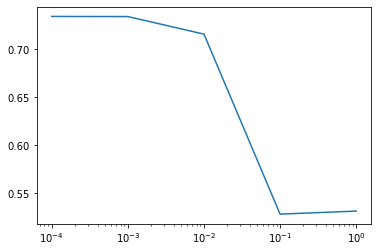

In [63]:
# Plot accuracy vs learning rate
lr_loss = []
lr_acc = []
for result in results:
    lr_loss.append(result[0])
    lr_acc.append(result[1])
    
f, ax = plt.subplots()
ax.plot(learning_rates_coarse, lr_acc)
ax.set_xscale("log")
f.show()

In [64]:
# Learning rate with highest accuracy betwen 0.0001 and 0.01
# Generate 6 random learning rates in this range
import numpy as np
bases = np.repeat(10, 3)
exponents_1 = -(np.random.rand(3) + 3) 
exponents_2 = -(np.random.rand(3) + 2) 
learning_rates_fine = np.power(bases, exponents_1).tolist() + np.power(bases, exponents_2).tolist()
learning_rates_fine

[0.00011442563339819563,
 0.00015852298768420864,
 0.0006534263760206797,
 0.0014971751823245729,
 0.00535758244317695,
 0.009584366200866126]

In [65]:
results = []
cnt = 0
for rate in learning_rates_fine:
    print("Count:", cnt)
    result = build_train_test(learning_rate=rate)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 869us/step - loss: 0.6365 - accuracy: 0.6690
Epoch 2/100
804/804 [==============================] - 1s 888us/step - loss: 0.5735 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 877us/step - loss: 0.5615 - accuracy: 0.7276
Epoch 4/100
804/804 [==============================] - 1s 855us/step - loss: 0.5560 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 1s 850us/step - loss: 0.5528 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 1s 853us/step - loss: 0.5504 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 849us/step - loss: 0.5485 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 1s 853us/step - loss: 0.5471 - accuracy: 0.7317
Epoch 9/100
804/804 [==============================] - 1s 947us/step - loss: 0.5459 - accuracy: 0.7321
Epoch 10/100
804/804 [==============================] - 1s 979us

804/804 [==============================] - 1s 842us/step - loss: 0.5334 - accuracy: 0.7384
Epoch 80/100
804/804 [==============================] - 1s 837us/step - loss: 0.5334 - accuracy: 0.7376
Epoch 81/100
804/804 [==============================] - 1s 837us/step - loss: 0.5333 - accuracy: 0.7378
Epoch 82/100
804/804 [==============================] - 1s 864us/step - loss: 0.5332 - accuracy: 0.7393
Epoch 83/100
804/804 [==============================] - 1s 869us/step - loss: 0.5333 - accuracy: 0.7375
Epoch 84/100
804/804 [==============================] - 1s 836us/step - loss: 0.5332 - accuracy: 0.7388
Epoch 85/100
804/804 [==============================] - 1s 836us/step - loss: 0.5331 - accuracy: 0.7377
Epoch 86/100
804/804 [==============================] - 1s 837us/step - loss: 0.5332 - accuracy: 0.7383
Epoch 87/100
804/804 [==============================] - 1s 839us/step - loss: 0.5330 - accuracy: 0.7395
Epoch 88/100
804/804 [==============================] - 1s 837us/step - loss:

804/804 [==============================] - 1s 974us/step - loss: 0.5327 - accuracy: 0.7403
Epoch 58/100
804/804 [==============================] - 1s 926us/step - loss: 0.5323 - accuracy: 0.7407
Epoch 59/100
804/804 [==============================] - 1s 881us/step - loss: 0.5320 - accuracy: 0.7410
Epoch 60/100
804/804 [==============================] - 1s 867us/step - loss: 0.5324 - accuracy: 0.7406
Epoch 61/100
804/804 [==============================] - 1s 847us/step - loss: 0.5322 - accuracy: 0.7402
Epoch 62/100
804/804 [==============================] - 1s 836us/step - loss: 0.5320 - accuracy: 0.7402
Epoch 63/100
804/804 [==============================] - 1s 826us/step - loss: 0.5319 - accuracy: 0.7412
Epoch 64/100
804/804 [==============================] - 1s 819us/step - loss: 0.5319 - accuracy: 0.7404
Epoch 65/100
804/804 [==============================] - 1s 799us/step - loss: 0.5318 - accuracy: 0.7409
Epoch 66/100
804/804 [==============================] - 1s 802us/step - loss:

804/804 [==============================] - 1s 838us/step - loss: 0.5341 - accuracy: 0.7393
Epoch 36/100
804/804 [==============================] - 1s 855us/step - loss: 0.5333 - accuracy: 0.7409
Epoch 37/100
804/804 [==============================] - 1s 848us/step - loss: 0.5334 - accuracy: 0.7409
Epoch 38/100
804/804 [==============================] - 1s 850us/step - loss: 0.5334 - accuracy: 0.7409
Epoch 39/100
804/804 [==============================] - 1s 851us/step - loss: 0.5333 - accuracy: 0.7406
Epoch 40/100
804/804 [==============================] - 1s 867us/step - loss: 0.5329 - accuracy: 0.7422
Epoch 41/100
804/804 [==============================] - 1s 918us/step - loss: 0.5325 - accuracy: 0.7415
Epoch 42/100
804/804 [==============================] - 1s 840us/step - loss: 0.5328 - accuracy: 0.7411
Epoch 43/100
804/804 [==============================] - 1s 809us/step - loss: 0.5326 - accuracy: 0.7416
Epoch 44/100
804/804 [==============================] - 1s 811us/step - loss:

804/804 [==============================] - 1s 971us/step - loss: 0.5406 - accuracy: 0.7363
Epoch 14/100
804/804 [==============================] - 1s 939us/step - loss: 0.5401 - accuracy: 0.7358
Epoch 15/100
804/804 [==============================] - 1s 886us/step - loss: 0.5395 - accuracy: 0.7362
Epoch 16/100
804/804 [==============================] - 1s 886us/step - loss: 0.5388 - accuracy: 0.7359
Epoch 17/100
804/804 [==============================] - 1s 985us/step - loss: 0.5388 - accuracy: 0.7359
Epoch 18/100
804/804 [==============================] - 1s 884us/step - loss: 0.5381 - accuracy: 0.7365
Epoch 19/100
804/804 [==============================] - 1s 880us/step - loss: 0.5380 - accuracy: 0.7356
Epoch 20/100
804/804 [==============================] - 1s 874us/step - loss: 0.5375 - accuracy: 0.7382
Epoch 21/100
804/804 [==============================] - 1s 848us/step - loss: 0.5373 - accuracy: 0.7375
Epoch 22/100
804/804 [==============================] - 1s 840us/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7417
Epoch 93/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7424
Epoch 94/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7412
Epoch 95/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7413
Epoch 96/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7419
Epoch 97/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7421
Epoch 98/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7423
Epoch 99/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7414
Epoch 100/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7416
268/268 - 0s - loss: 0.5836 - accuracy: 0.7306 - 279ms/epoch - 1ms/step
Count: 4
Epoch 1/100
8

804/804 [==============================] - 1s 862us/step - loss: 0.5417 - accuracy: 0.7311
Epoch 71/100
804/804 [==============================] - 1s 851us/step - loss: 0.5412 - accuracy: 0.7334
Epoch 72/100
804/804 [==============================] - 1s 876us/step - loss: 0.5406 - accuracy: 0.7314
Epoch 73/100
804/804 [==============================] - 1s 858us/step - loss: 0.5403 - accuracy: 0.7333
Epoch 74/100
804/804 [==============================] - 1s 856us/step - loss: 0.5399 - accuracy: 0.7335
Epoch 75/100
804/804 [==============================] - 1s 862us/step - loss: 0.5402 - accuracy: 0.7333
Epoch 76/100
804/804 [==============================] - 1s 897us/step - loss: 0.5418 - accuracy: 0.7340
Epoch 77/100
804/804 [==============================] - 1s 884us/step - loss: 0.5403 - accuracy: 0.7321
Epoch 78/100
804/804 [==============================] - 1s 930us/step - loss: 0.5399 - accuracy: 0.7326
Epoch 79/100
804/804 [==============================] - 1s 877us/step - loss:

804/804 [==============================] - 1s 845us/step - loss: 0.5525 - accuracy: 0.7204
Epoch 49/100
804/804 [==============================] - 1s 851us/step - loss: 0.5493 - accuracy: 0.7202
Epoch 50/100
804/804 [==============================] - 1s 889us/step - loss: 0.5499 - accuracy: 0.7194
Epoch 51/100
804/804 [==============================] - 1s 889us/step - loss: 0.5491 - accuracy: 0.7222
Epoch 52/100
804/804 [==============================] - 1s 847us/step - loss: 0.5495 - accuracy: 0.7202
Epoch 53/100
804/804 [==============================] - 1s 846us/step - loss: 0.5510 - accuracy: 0.7194
Epoch 54/100
804/804 [==============================] - 1s 848us/step - loss: 0.5491 - accuracy: 0.7184
Epoch 55/100
804/804 [==============================] - 1s 847us/step - loss: 0.5499 - accuracy: 0.7190
Epoch 56/100
804/804 [==============================] - 1s 846us/step - loss: 0.5500 - accuracy: 0.7210
Epoch 57/100
804/804 [==============================] - 1s 845us/step - loss:

In [66]:
print_results("Learning Rates", learning_rates_fine, results)

Learning Rates
0.00011442563339819563
Model Loss: 0.5575138926506042
Model Accuracy: 0.731195330619812

0.00015852298768420864
Model Loss: 0.5693171620368958
Model Accuracy: 0.7272303104400635

0.0006534263760206797
Model Loss: 0.5778489708900452
Model Accuracy: 0.7292128205299377

0.0014971751823245729
Model Loss: 0.583599865436554
Model Accuracy: 0.7306122183799744

0.00535758244317695
Model Loss: 0.573337733745575
Model Accuracy: 0.7229154706001282

0.009584366200866126
Model Loss: 0.5880467891693115
Model Accuracy: 0.7257142663002014



### Result: Learning Rate 0.00011442563339819563 yields the highest accuracy (0.731) and lowest loss (0.557)

### Combine Optimized Parameters

In [69]:
result = build_train_test(architecture=(80, 50, 30), activation="tanh",
                          learning_rate=0.00011442563339819563,
                          epochs=100, cat_cutoffs={"CLASSIFICATION": 1800})

Epoch 1/100
804/804 [==============================] - 1s 945us/step - loss: 0.5987 - accuracy: 0.6951
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5674 - accuracy: 0.7243
Epoch 3/100
804/804 [==============================] - 1s 922us/step - loss: 0.5606 - accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 1s 951us/step - loss: 0.5560 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 1s 995us/step - loss: 0.5529 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 928us/step - loss: 0.5507 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 951us/step - loss: 0.5491 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 948us/step - loss: 0.5479 - accuracy: 0.7335
Epoch 9/100
804/804 [==============================] - 1s 939us/step - loss: 0.5465 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 928us/step - los

804/804 [==============================] - 1s 934us/step - loss: 0.5311 - accuracy: 0.7430
Epoch 81/100
804/804 [==============================] - 1s 943us/step - loss: 0.5315 - accuracy: 0.7426
Epoch 82/100
804/804 [==============================] - 1s 916us/step - loss: 0.5309 - accuracy: 0.7427
Epoch 83/100
804/804 [==============================] - 1s 913us/step - loss: 0.5310 - accuracy: 0.7428
Epoch 84/100
804/804 [==============================] - 1s 960us/step - loss: 0.5310 - accuracy: 0.7427
Epoch 85/100
804/804 [==============================] - 1s 967us/step - loss: 0.5308 - accuracy: 0.7425
Epoch 86/100
804/804 [==============================] - 1s 957us/step - loss: 0.5310 - accuracy: 0.7423
Epoch 87/100
804/804 [==============================] - 1s 924us/step - loss: 0.5308 - accuracy: 0.7434
Epoch 88/100
804/804 [==============================] - 1s 969us/step - loss: 0.5306 - accuracy: 0.7424
Epoch 89/100
804/804 [==============================] - 1s 994us/step - loss:

In [70]:
result

(0.5540549755096436, 0.7264139652252197)

## Result: Roughly same as original model, accuracy decreased from 0.731 to 0.726

In [71]:
# Vary Batch Size with Optimized Values
batch_sizes_coarse = [2**i for i in range(7)]

results = []
cnt = 0
for batch_size in batch_sizes_coarse:
    print("Count:", cnt)
    result = build_train_test(architecture=(80, 50, 30), activation="tanh",
                              learning_rate=0.00011442563339819563,
                              epochs=100, cat_cutoffs={"CLASSIFICATION": 1800},
                              batch_size=batch_size)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
25724/25724 [==============================] - 19s 711us/step - loss: 0.5686 - accuracy: 0.7216
Epoch 2/100
25724/25724 [==============================] - 18s 697us/step - loss: 0.5541 - accuracy: 0.7286
Epoch 3/100
25724/25724 [==============================] - 19s 720us/step - loss: 0.5501 - accuracy: 0.7333
Epoch 4/100
25724/25724 [==============================] - 19s 726us/step - loss: 0.5478 - accuracy: 0.7338
Epoch 5/100
25724/25724 [==============================] - 19s 731us/step - loss: 0.5458 - accuracy: 0.7343
Epoch 6/100
25724/25724 [==============================] - 19s 727us/step - loss: 0.5447 - accuracy: 0.7330
Epoch 7/100
25724/25724 [==============================] - 19s 724us/step - loss: 0.5439 - accuracy: 0.7356
Epoch 8/100
25724/25724 [==============================] - 19s 729us/step - loss: 0.5429 - accuracy: 0.7346
Epoch 9/100
25724/25724 [==============================] - 19s 721us/step - loss: 0.5418 - accuracy: 0.7366
Epoch 10/100
25724/

25724/25724 [==============================] - 18s 694us/step - loss: 0.5288 - accuracy: 0.7443
Epoch 77/100
25724/25724 [==============================] - 19s 752us/step - loss: 0.5289 - accuracy: 0.7437
Epoch 78/100
25724/25724 [==============================] - 21s 828us/step - loss: 0.5283 - accuracy: 0.7448
Epoch 79/100
25724/25724 [==============================] - 20s 761us/step - loss: 0.5288 - accuracy: 0.7429
Epoch 80/100
25724/25724 [==============================] - 21s 825us/step - loss: 0.5286 - accuracy: 0.7441
Epoch 81/100
25724/25724 [==============================] - 19s 728us/step - loss: 0.5284 - accuracy: 0.7443
Epoch 82/100
25724/25724 [==============================] - 20s 760us/step - loss: 0.5285 - accuracy: 0.7438
Epoch 83/100
25724/25724 [==============================] - 23s 878us/step - loss: 0.5282 - accuracy: 0.7438
Epoch 84/100
25724/25724 [==============================] - 19s 740us/step - loss: 0.5283 - accuracy: 0.7442
Epoch 85/100
25724/25724 [======

12862/12862 [==============================] - 11s 855us/step - loss: 0.5305 - accuracy: 0.7420
Epoch 51/100
12862/12862 [==============================] - 11s 862us/step - loss: 0.5303 - accuracy: 0.7422
Epoch 52/100
12862/12862 [==============================] - 11s 867us/step - loss: 0.5302 - accuracy: 0.7428
Epoch 53/100
12862/12862 [==============================] - 11s 860us/step - loss: 0.5302 - accuracy: 0.7420
Epoch 54/100
12862/12862 [==============================] - 11s 867us/step - loss: 0.5300 - accuracy: 0.7425
Epoch 55/100
12862/12862 [==============================] - 11s 890us/step - loss: 0.5297 - accuracy: 0.7428
Epoch 56/100
12862/12862 [==============================] - 11s 888us/step - loss: 0.5297 - accuracy: 0.7432
Epoch 57/100
12862/12862 [==============================] - 12s 938us/step - loss: 0.5296 - accuracy: 0.7428
Epoch 58/100
12862/12862 [==============================] - 11s 835us/step - loss: 0.5294 - accuracy: 0.7437
Epoch 59/100
12862/12862 [======

6431/6431 [==============================] - 5s 813us/step - loss: 0.5370 - accuracy: 0.7383
Epoch 26/100
6431/6431 [==============================] - 5s 803us/step - loss: 0.5365 - accuracy: 0.7385
Epoch 27/100
6431/6431 [==============================] - 5s 821us/step - loss: 0.5363 - accuracy: 0.7392
Epoch 28/100
6431/6431 [==============================] - 5s 802us/step - loss: 0.5359 - accuracy: 0.7399
Epoch 29/100
6431/6431 [==============================] - 5s 809us/step - loss: 0.5356 - accuracy: 0.7381
Epoch 30/100
6431/6431 [==============================] - 5s 804us/step - loss: 0.5355 - accuracy: 0.7407
Epoch 31/100
6431/6431 [==============================] - 5s 819us/step - loss: 0.5352 - accuracy: 0.7400
Epoch 32/100
6431/6431 [==============================] - 5s 806us/step - loss: 0.5353 - accuracy: 0.7397
Epoch 33/100
6431/6431 [==============================] - 5s 806us/step - loss: 0.5348 - accuracy: 0.7395
Epoch 34/100
6431/6431 [==============================] - 5

3216/3216 [==============================] - 3s 900us/step - loss: 0.5742 - accuracy: 0.7179
Epoch 2/100
3216/3216 [==============================] - 3s 928us/step - loss: 0.5565 - accuracy: 0.7320
Epoch 3/100
3216/3216 [==============================] - 3s 893us/step - loss: 0.5502 - accuracy: 0.7329
Epoch 4/100
3216/3216 [==============================] - 3s 911us/step - loss: 0.5474 - accuracy: 0.7345
Epoch 5/100
3216/3216 [==============================] - 3s 908us/step - loss: 0.5448 - accuracy: 0.7338
Epoch 6/100
3216/3216 [==============================] - 3s 881us/step - loss: 0.5436 - accuracy: 0.7347
Epoch 7/100
3216/3216 [==============================] - 3s 897us/step - loss: 0.5425 - accuracy: 0.7353
Epoch 8/100
3216/3216 [==============================] - 3s 916us/step - loss: 0.5415 - accuracy: 0.7361
Epoch 9/100
3216/3216 [==============================] - 3s 925us/step - loss: 0.5405 - accuracy: 0.7359
Epoch 10/100
3216/3216 [==============================] - 3s 941us/

3216/3216 [==============================] - 3s 890us/step - loss: 0.5262 - accuracy: 0.7450
Epoch 79/100
3216/3216 [==============================] - 3s 899us/step - loss: 0.5262 - accuracy: 0.7448
Epoch 80/100
3216/3216 [==============================] - 3s 882us/step - loss: 0.5262 - accuracy: 0.7447
Epoch 81/100
3216/3216 [==============================] - 3s 885us/step - loss: 0.5259 - accuracy: 0.7447
Epoch 82/100
3216/3216 [==============================] - 3s 902us/step - loss: 0.5260 - accuracy: 0.7448
Epoch 83/100
3216/3216 [==============================] - 3s 895us/step - loss: 0.5260 - accuracy: 0.7443
Epoch 84/100
3216/3216 [==============================] - 3s 934us/step - loss: 0.5259 - accuracy: 0.7435
Epoch 85/100
3216/3216 [==============================] - 3s 985us/step - loss: 0.5258 - accuracy: 0.7456
Epoch 86/100
3216/3216 [==============================] - 3s 903us/step - loss: 0.5257 - accuracy: 0.7438
Epoch 87/100
3216/3216 [==============================] - 3

Epoch 55/100
1608/1608 [==============================] - 2s 986us/step - loss: 0.5328 - accuracy: 0.7413
Epoch 56/100
1608/1608 [==============================] - 2s 987us/step - loss: 0.5326 - accuracy: 0.7410
Epoch 57/100
1608/1608 [==============================] - 2s 1ms/step - loss: 0.5326 - accuracy: 0.7409
Epoch 58/100
1608/1608 [==============================] - 1s 928us/step - loss: 0.5324 - accuracy: 0.7410
Epoch 59/100
1608/1608 [==============================] - 1s 921us/step - loss: 0.5321 - accuracy: 0.7421
Epoch 60/100
1608/1608 [==============================] - 2s 952us/step - loss: 0.5322 - accuracy: 0.7411
Epoch 61/100
1608/1608 [==============================] - 2s 935us/step - loss: 0.5321 - accuracy: 0.7415
Epoch 62/100
1608/1608 [==============================] - 2s 988us/step - loss: 0.5318 - accuracy: 0.7426
Epoch 63/100
1608/1608 [==============================] - 2s 1ms/step - loss: 0.5320 - accuracy: 0.7418
Epoch 64/100
1608/1608 [==========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7376
Epoch 33/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7380
Epoch 34/100
804/804 [==============================] - 1s 960us/step - loss: 0.5355 - accuracy: 0.7388
Epoch 35/100
804/804 [==============================] - 1s 969us/step - loss: 0.5350 - accuracy: 0.7387
Epoch 36/100
804/804 [==============================] - 1s 961us/step - loss: 0.5346 - accuracy: 0.7384
Epoch 37/100
804/804 [==============================] - 1s 964us/step - loss: 0.5345 - accuracy: 0.7401
Epoch 38/100
804/804 [==============================] - 1s 962us/step - loss: 0.5347 - accuracy: 0.7381
Epoch 39/100
804/804 [==============================] - 1s 963us/step - loss: 0.5340 - accuracy: 0.7385
Epoch 40/100
804/804 [==============================] - 1s 959us/step - loss: 0.5341 - accuracy: 0.7380
Epoch 41/100
804/804 [==============================] - 1s 964us/step - loss: 0.5

402/402 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7307
Epoch 11/100
402/402 [==============================] - 0s 986us/step - loss: 0.5506 - accuracy: 0.7320
Epoch 12/100
402/402 [==============================] - 0s 980us/step - loss: 0.5498 - accuracy: 0.7317
Epoch 13/100
402/402 [==============================] - 0s 995us/step - loss: 0.5491 - accuracy: 0.7314
Epoch 14/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7327
Epoch 15/100
402/402 [==============================] - 0s 998us/step - loss: 0.5478 - accuracy: 0.7327
Epoch 16/100
402/402 [==============================] - 0s 983us/step - loss: 0.5471 - accuracy: 0.7325
Epoch 17/100
402/402 [==============================] - 0s 968us/step - loss: 0.5465 - accuracy: 0.7336
Epoch 18/100
402/402 [==============================] - 0s 978us/step - loss: 0.5461 - accuracy: 0.7323
Epoch 19/100
402/402 [==============================] - 0s 982us/step - loss: 0.5

402/402 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7398
Epoch 90/100
402/402 [==============================] - 0s 978us/step - loss: 0.5342 - accuracy: 0.7402
Epoch 91/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.7398
Epoch 92/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.7395
Epoch 93/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7392
Epoch 94/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7392
Epoch 95/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7399
Epoch 96/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7397
Epoch 97/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7399
Epoch 98/100
402/402 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy

In [72]:
print_results("Batch Sizes", batch_sizes_coarse, results)

Batch Sizes
1
Model Loss: 0.5533528327941895
Model Accuracy: 0.7253644466400146

2
Model Loss: 0.5567432045936584
Model Accuracy: 0.7273469567298889

4
Model Loss: 0.5553191900253296
Model Accuracy: 0.7268804907798767

8
Model Loss: 0.565013587474823
Model Accuracy: 0.7250145673751831

16
Model Loss: 0.552943766117096
Model Accuracy: 0.728863000869751

32
Model Loss: 0.5580800771713257
Model Accuracy: 0.7286297082901001

64
Model Loss: 0.5440598726272583
Model Accuracy: 0.7364431619644165



Result: Batch size of 64 generates the highest accuracy (0.736) and lowest loss (0.544)
    
Summary:

Best performing model had the following parameters:

     . Three hidden layers with 80, 50, and 30 nodes
     . relu activation function
     . Learning rate = 0.001 (default)
     . 100 epochs
     . No bucketing of categorical variables
     . Batch size = 32 (default)
     
Testing Set Performance:

    . Accuracy: 0.740
    . Loss: 0.561
    
Build, Train, Test, and Save Optimized Model


In [73]:
# Read data
application_df = pd.read_csv("Resources/charity_data.csv")

# Drop unnecessary identification columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Encode categorical columns without bucketing
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
# Drop redundant "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)

# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model: 3 hidden layers with 80, 50, and 30 nodes and relu activation function at inner layers
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn_optimized = tf.keras.models.Sequential()
# Input layer and first hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_413 (Dense)           (None, 80)                9280      
                                                                 
 dense_414 (Dense)           (None, 50)                4050      
                                                                 
 dense_415 (Dense)           (None, 30)                1530      
                                                                 
 dense_416 (Dense)           (None, 1)                 31        
                                                                 
Total params: 14,891
Trainable params: 14,891
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Add model weight checkpoints during training
os.makedirs("checkpoints_optimized/", exist_ok=True)
checkpoint_path="checkpoints_optimized/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [76]:
# Train the model
fit_model_optimized = nn_optimized.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 918us/step - loss: 0.5693 - accuracy: 0.7220
Epoch 2/100
804/804 [==============================] - 1s 918us/step - loss: 0.5525 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7323
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7339
Epoch 5/100
781/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7338
Epoch 5: saving model to checkpoints_optimized/weights.5.hdf5
804/804 [==============================] - 1s 985us/step - loss: 0.5459 - accuracy: 0.7337
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.7343
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5436 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 1s 986us/step - loss: 0.5435 - accuracy: 0.7354
Epoch 9/100
804/804 [================

804/804 [==============================] - 1s 921us/step - loss: 0.5291 - accuracy: 0.7433
Epoch 64/100
804/804 [==============================] - 1s 902us/step - loss: 0.5290 - accuracy: 0.7428
Epoch 65/100
788/804 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7431
Epoch 65: saving model to checkpoints_optimized/weights.65.hdf5
804/804 [==============================] - 1s 912us/step - loss: 0.5291 - accuracy: 0.7433
Epoch 66/100
804/804 [==============================] - 1s 921us/step - loss: 0.5289 - accuracy: 0.7430
Epoch 67/100
804/804 [==============================] - 1s 916us/step - loss: 0.5288 - accuracy: 0.7426
Epoch 68/100
804/804 [==============================] - 1s 898us/step - loss: 0.5286 - accuracy: 0.7434
Epoch 69/100
804/804 [==============================] - 1s 903us/step - loss: 0.5285 - accuracy: 0.7435
Epoch 70/100
790/804 [============================>.] - ETA: 0s - loss: 0.5288 - accuracy: 0.7422
Epoch 70: saving model to checkpoints_

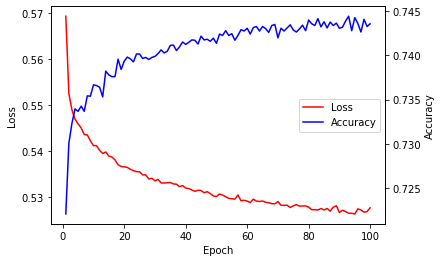

In [77]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model_optimized.history,
                          index=range(1, len(fit_model_optimized.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()


In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5731 - accuracy: 0.7291 - 210ms/epoch - 783us/step
Loss: 0.5730714797973633, Accuracy: 0.7290962338447571


In [79]:
# Export and save model to HDF5 file
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")